# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


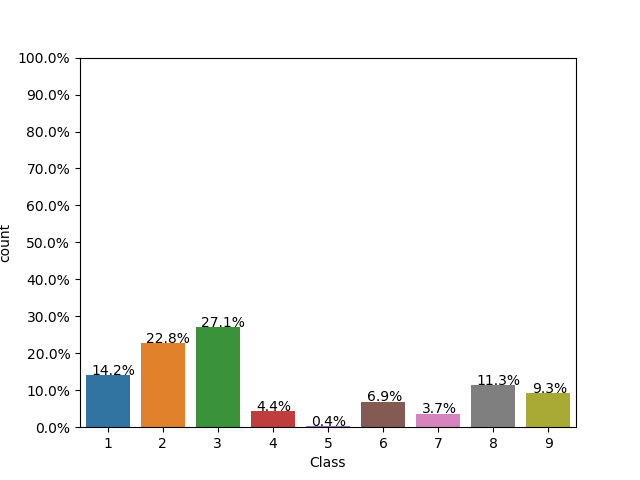

In [3]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [4]:
Y=pd.read_csv("trainLabels.csv")

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [5]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

   Class                    ID      size
0      9  01azqd4InC7m9JpocGv5  4.234863
1      2  01IsoiSMh5gxyDYTl4CB  5.538818
2      9  01jsnpXSAlgw6aPeDxrU  3.887939
3      1  01kcPWA9K2BOxQeS5Rju  0.574219
4      8  01SuzwMJEIXsK7A8dQbl  0.370850


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


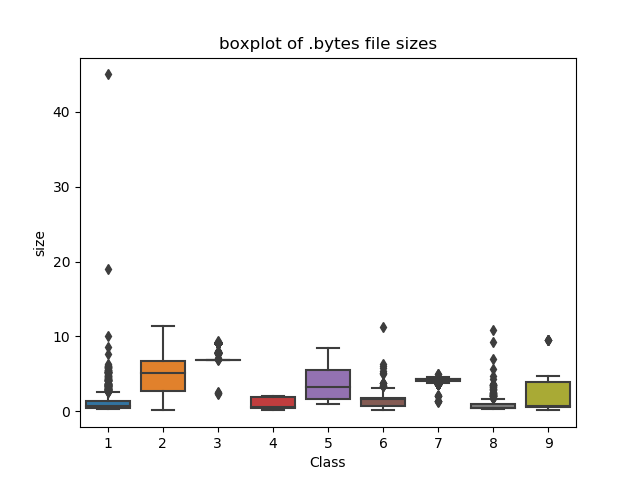

In [5]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

## DO not re-run this cell

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [6]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...     f7    f8    f9    fa    fb    fc    fd     fe     ff    ??  
0  2965  ...   2804  3687  3101  3211  3097  2758  3099   2759   5753  1824  
1  9291  ...    451  6536   439   281   302  7639   518  17001  54902  8588  

[2 rows x 258 columns]

In [7]:
data_size_byte.head(2)

Class                    ID      size
0      9  01azqd4InC7m9JpocGv5  4.234863
1      2  01IsoiSMh5gxyDYTl4CB  5.538818

In [8]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8    ...       f9    fa    fb    fc    fd     fe     ff    ??  Class  \
0  2965    ...     3101  3211  3097  2758  3099   2759   5753  1824      9   
1  9291    ...      439   281   302  7639   518  17001  54902  8588      2   

       size  
0  4.234863  
1  5.538818  

[2 rows x 260 columns]

In [9]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [10]:
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8    ...          f9        fa  \
0  0.001835  0.002058  0.002946  0.002638    ...     0.01356  0.013107   
1  0.003873  0.004747  0.006984  0.008267    ...     0.00192  0.001147   

         fb        fc        fd        fe        ff        ??  Class      size  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129      9  0.092219  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606      2  0.121236  

[2 rows x 260 columns]

In [11]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8    ...           f9        fa  \
0  0.001835  0.002058  0.002946  0.002638    ...     0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267    ...     0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104    ...     0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959    ...     0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376    ...     0.001530  0.000853   

         fb        fc        fd        fe        ff        ??  Class      size  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129      9  0.092219  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606      2  0.121236  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033      9  0.084499  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984      1  0.010759  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636      8  0.006233  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


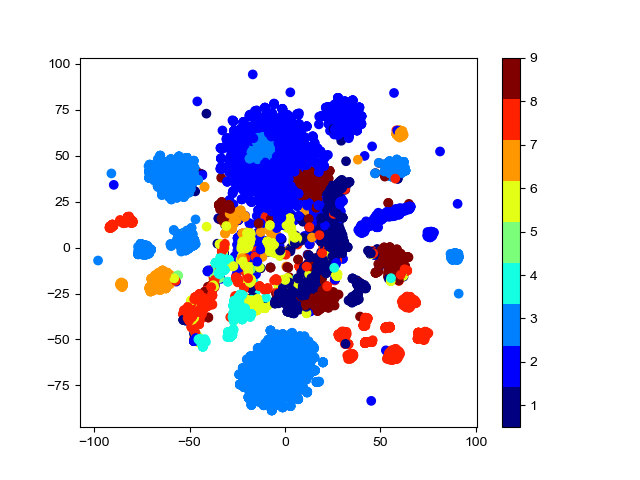

In [18]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


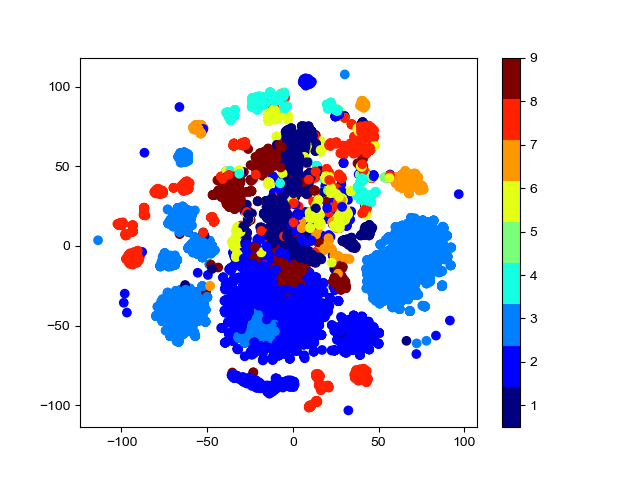

In [19]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [12]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [13]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


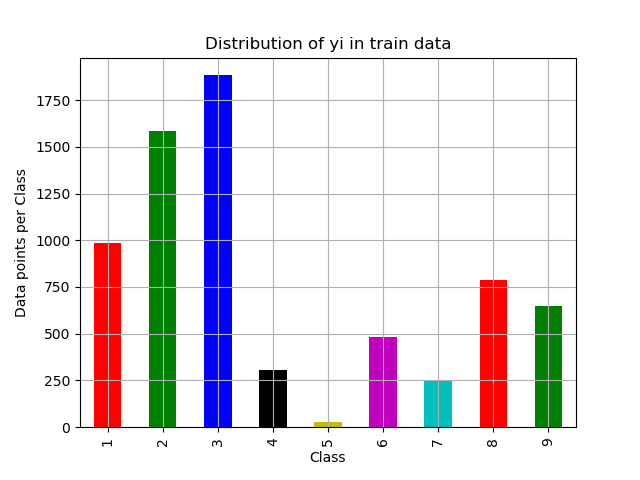

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)


In [14]:
plt.close()
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()#sortlevel()
test_class_distribution = y_test.value_counts().sort_index()#.sortlevel()
cv_class_distribution = y_cv.value_counts().sort_index()#.sortlevel()

# my_colors = 'rgbkymc'
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

In [12]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.493476250570028
Log loss on Test Data using Random Model 2.4604734259698806
Number of misclassified points  89.28242870285189
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


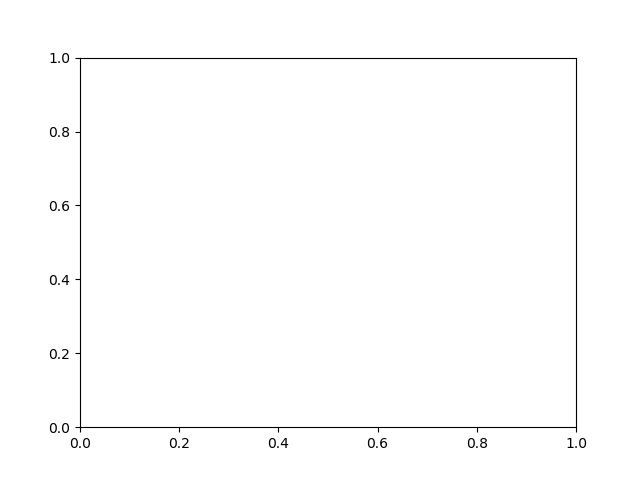

<IPython.core.display.Javascript object>


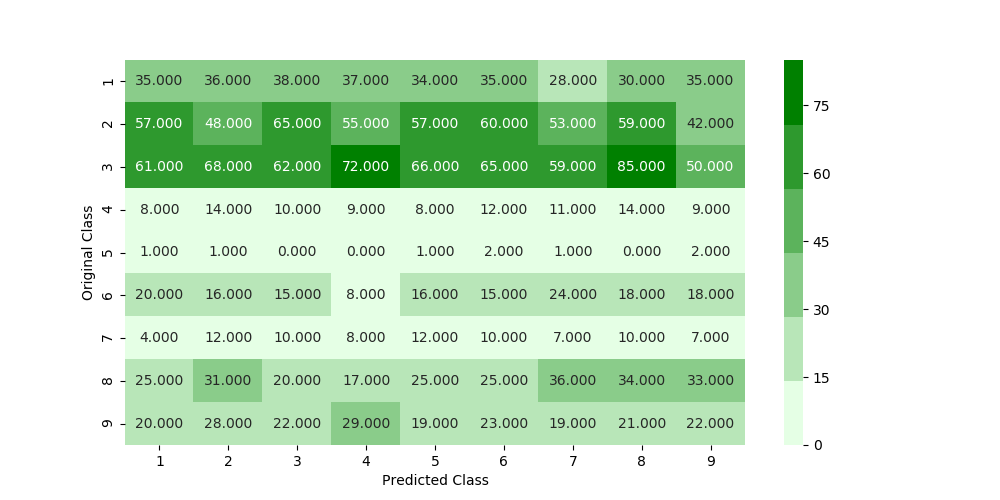

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


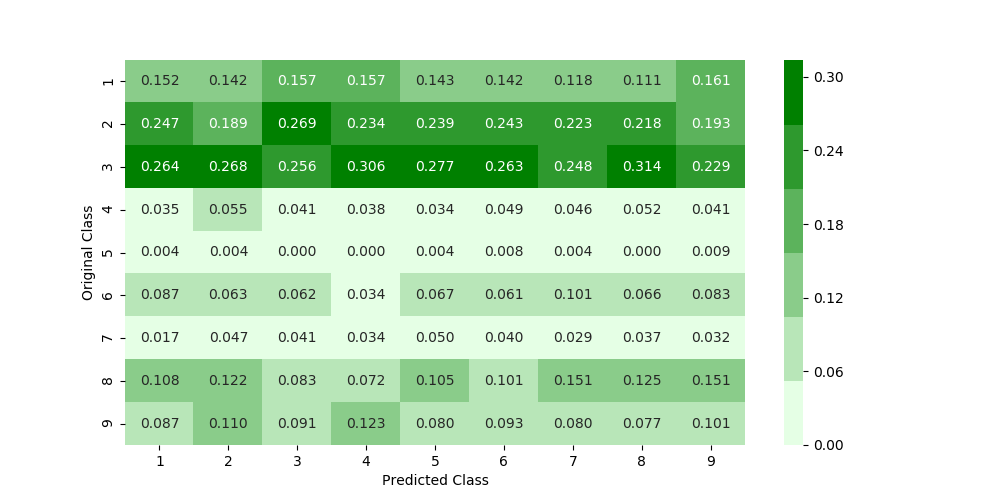

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


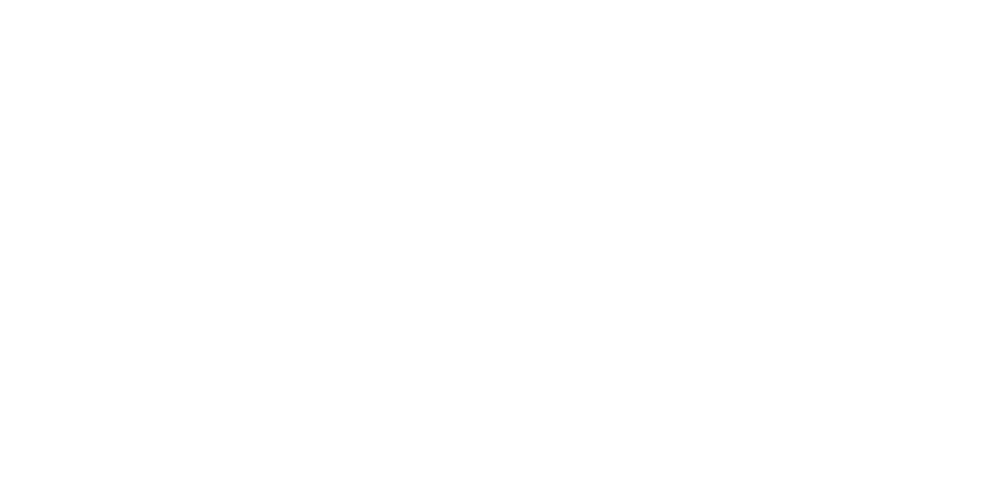

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.11157164384551466
log_loss for c =  50 is 0.09696429708050865
log_loss for c =  100 is 0.0950865275864462
log_loss for c =  500 is 0.09594983163463172
log_loss for c =  1000 is 0.09568041109203713
log_loss for c =  2000 is 0.09617303082764878
log_loss for c =  3000 is 0.09617435618600804


<IPython.core.display.Javascript object>


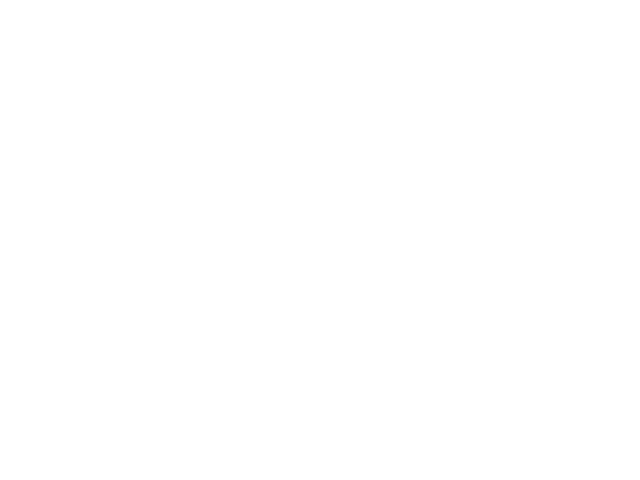

For values of best alpha =  100 The train log loss is: 0.028625251450565735
For values of best alpha =  100 The cross validation log loss is: 0.0950865275864462
For values of best alpha =  100 The test log loss is: 0.08665332884582864
Number of misclassified points  2.2539098436062557
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


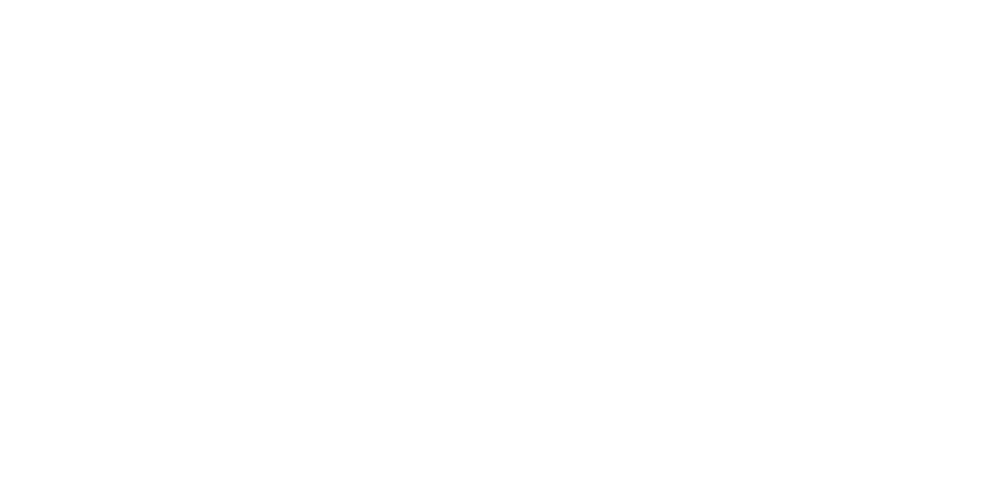

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


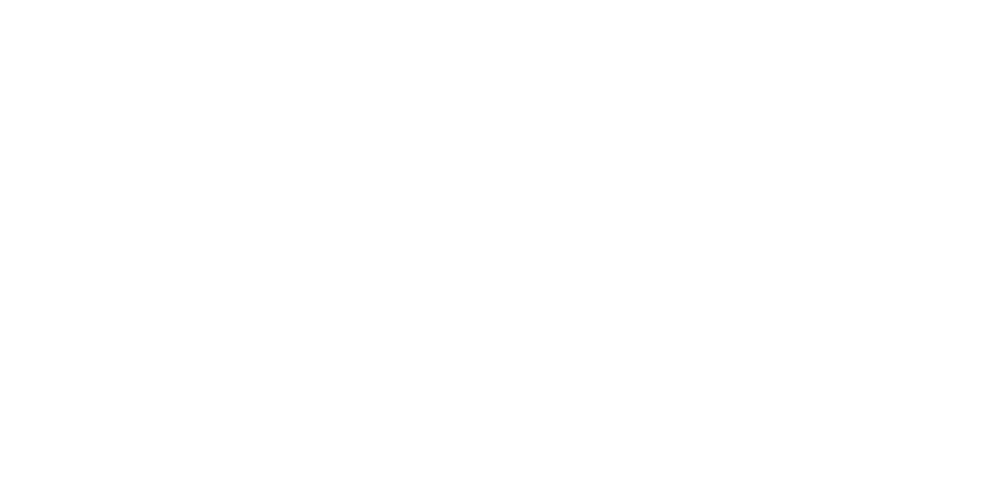

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


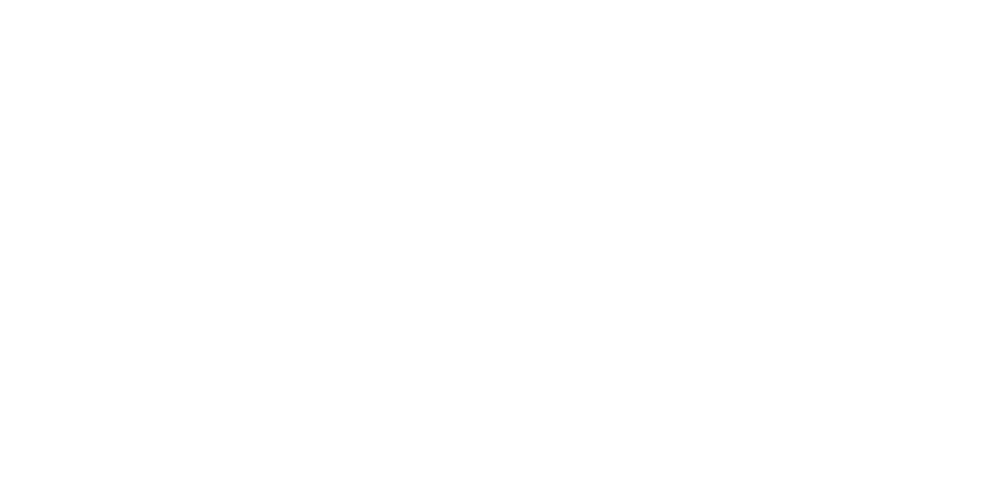

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

log_loss for c =  10 is 0.21141965982131736
log_loss for c =  50 is 0.11973015361207139
log_loss for c =  100 is 0.09604572803993582
log_loss for c =  500 is 0.09309776229406479
log_loss for c =  1000 is 0.0926392195921875
log_loss for c =  2000 is 0.09337221416872009


<IPython.core.display.Javascript object>


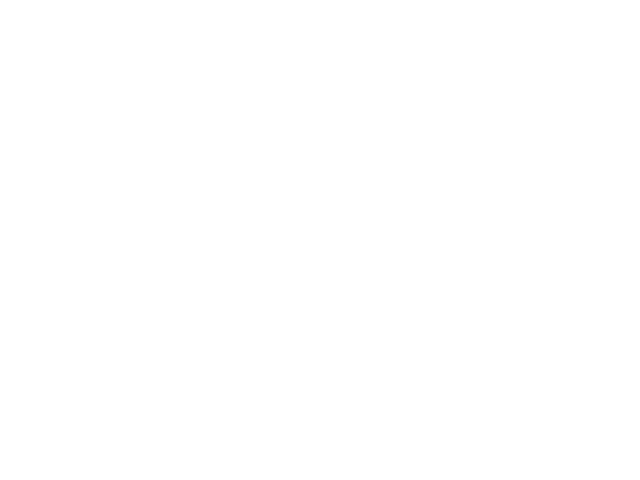

For values of best alpha =  1000 The train log loss is: 0.022925073792437377
For values of best alpha =  1000 The cross validation log loss is: 0.0926392195921875
For values of best alpha =  1000 The test log loss is: 0.06532751432198568
Number of misclassified points  1.3339466421343145
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


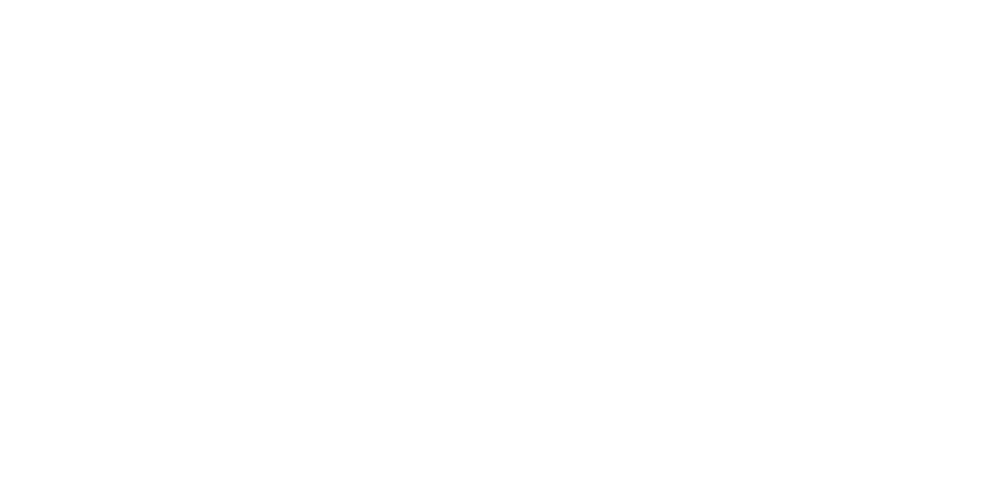

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


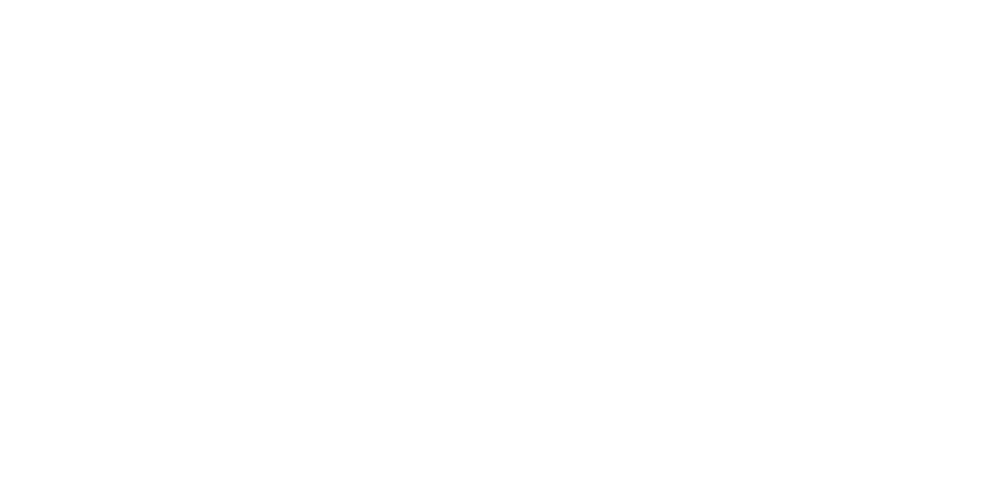

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


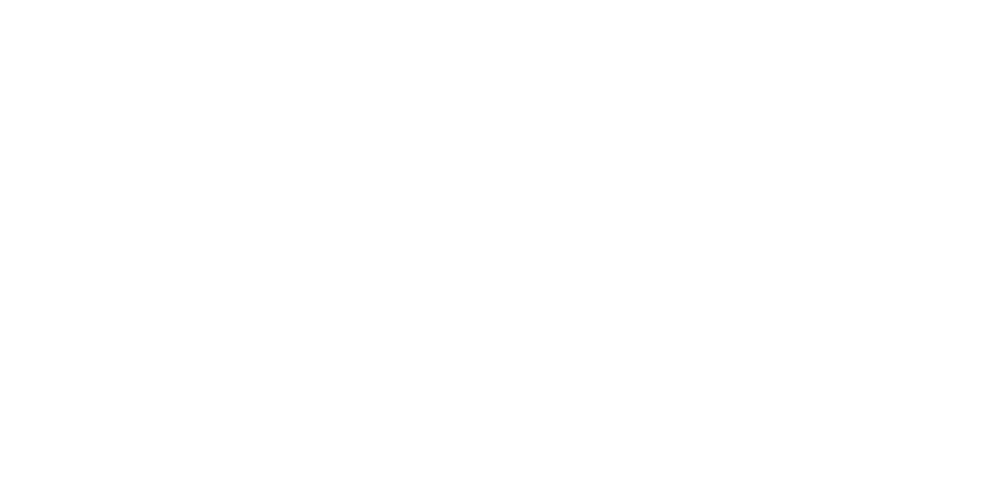

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [24]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  8.1min remaining:   54.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [25]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.3}


In [26]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=1, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.023071593469527234
cv loss 0.0922959108365791
test loss 0.0655375289593565


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [13]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    edx  esi  eax  ebx  ecx  edi  ebp  esp  \
0      323        0       3  ...     18   66   15   43   83    0   17   48   
1        0        0       3  ...     18   29   48   82   12    0   14    0   
2      145        0       3  ...     13   42   10   67   14    0   11    0   
3        0        0       3  ...      6    8   14    7    2    0    8    0   
4        0        0       3  ...     12    9   18   29    5    0   11    0   

   eip  Class  
0   29      1  
1   20      1  
2    9      1  
3    6      1  
4   11      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [14]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

   Class                    ID       size
0      9  01azqd4InC7m9JpocGv5  56.229886
1      2  01IsoiSMh5gxyDYTl4CB  13.999378
2      9  01jsnpXSAlgw6aPeDxrU   8.507785
3      1  01kcPWA9K2BOxQeS5Rju   0.078190
4      8  01SuzwMJEIXsK7A8dQbl   0.996723


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


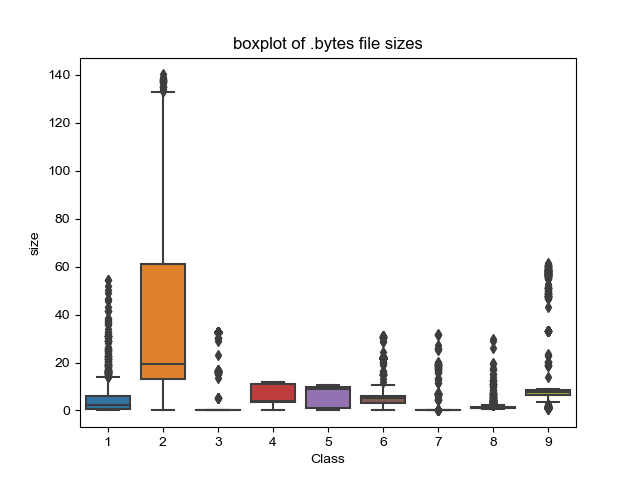

In [25]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [17]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:    ...     esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3    ...      66   15   43   83    0   17   48   29   
1        0        0       3    ...      29   48   82   12    0   14    0   20   
2      145        0       3    ...      42   10   67   14    0   11    0    9   
3        0        0       3    ...       8   14    7    2    0    8    0    6   
4        0        0       3    ...       9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [18]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:    ...          esi       eax       ebx  \
0  0.000084      0.0  0.000072    ...     0.000746  0.000301  0.000360   
1  0.000000      0.0  0.000072    ...     0.000328  0.000965  0.000686   
2  0.000038      0.0  0.000072    ...     0.000475  0.000201  0.000560   
3  0.000000      0.0  0.000072    ...     0.000090  0.000281  0.000059   
4  0.000000      0.0  0.000072    ...     0.000102  0.000362  0.000243   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001057  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.000153  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.000178  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.000025  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.000064  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


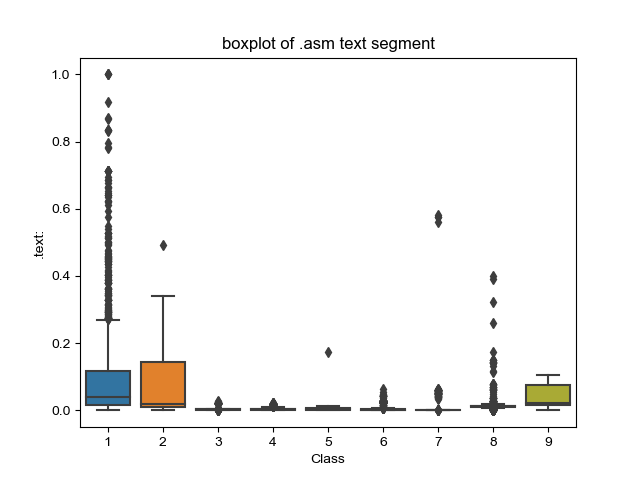

In [28]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


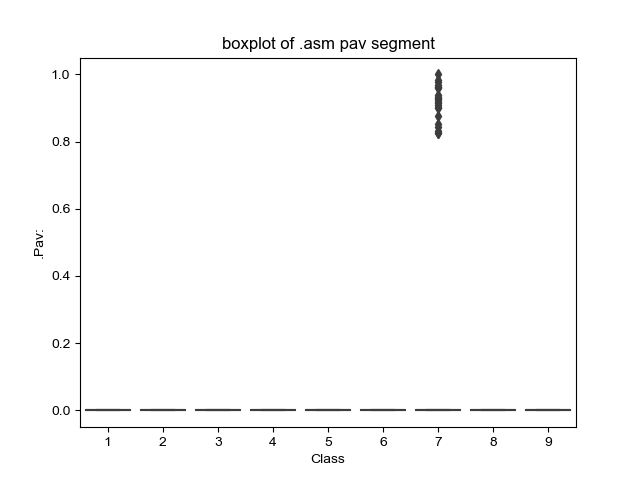

In [29]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


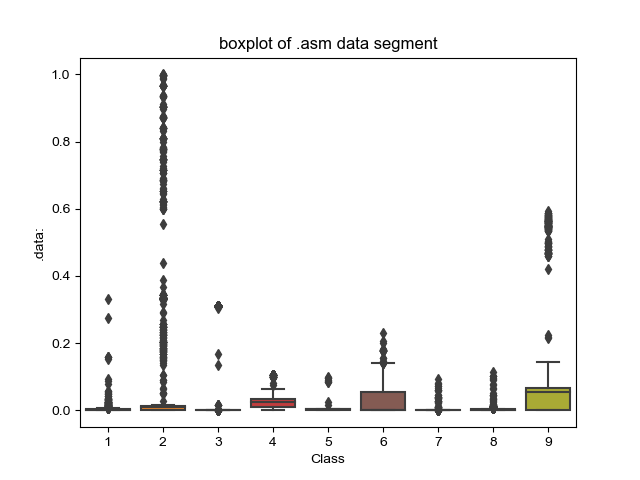

In [30]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


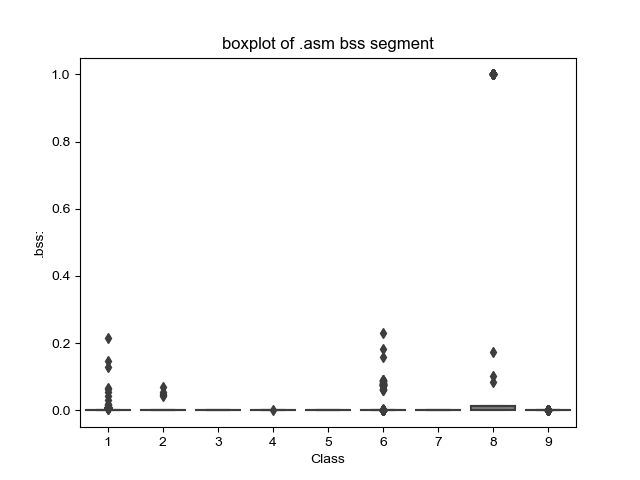

In [31]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


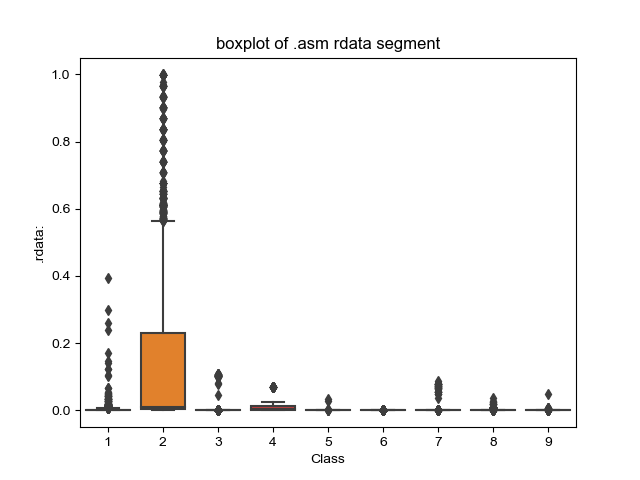

In [32]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


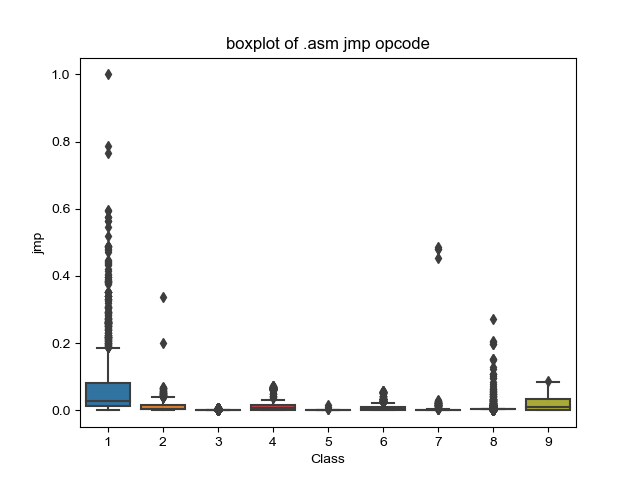

In [33]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


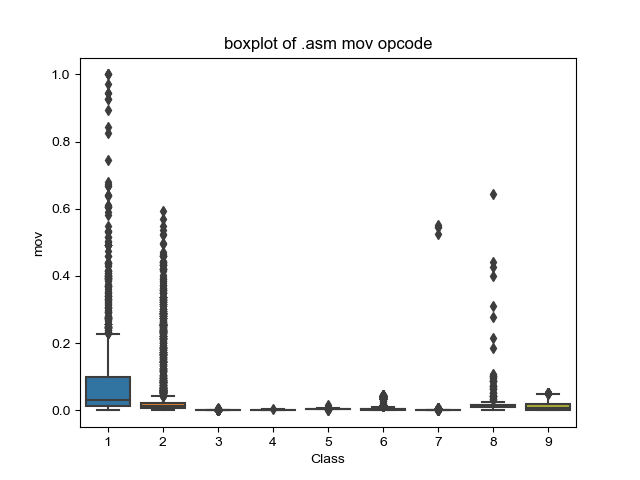

In [34]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


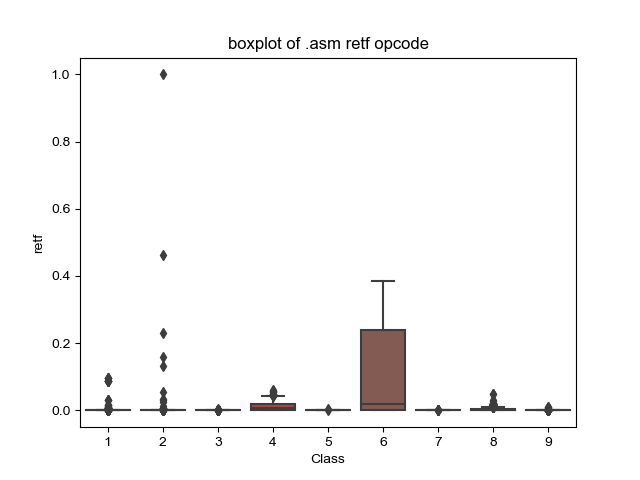

In [35]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


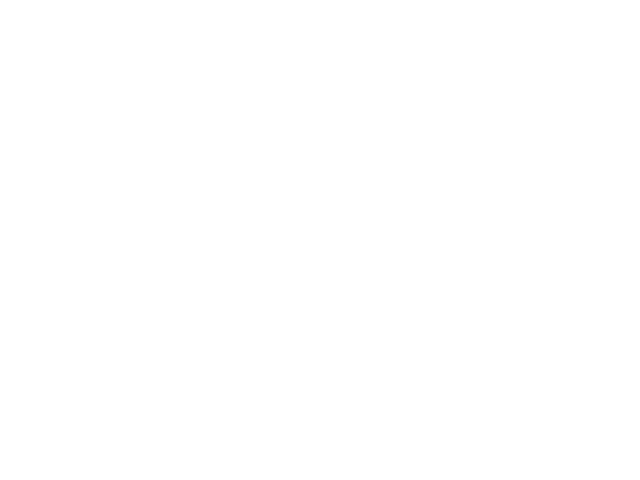

In [36]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


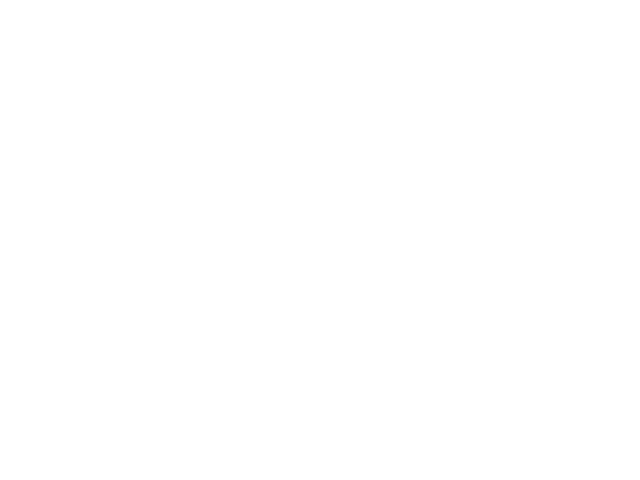

In [37]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


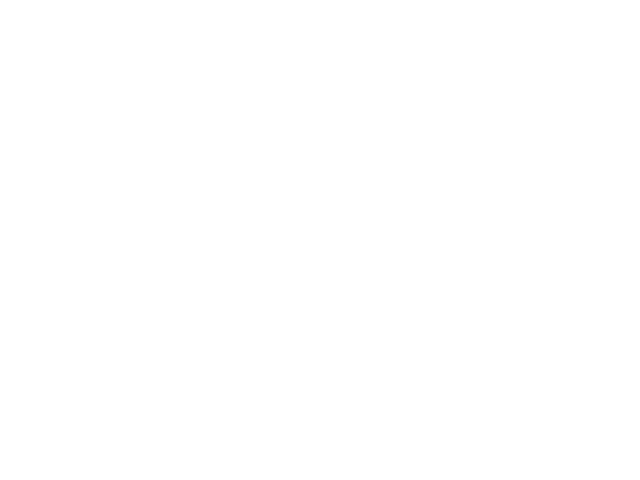

In [38]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [15]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [16]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [21]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.057790203487346314
log_loss for k =  3 is 0.07108368472140039
log_loss for k =  5 is 0.08171015009225038
log_loss for k =  7 is 0.09100171161638985
log_loss for k =  9 is 0.10049193837065191
log_loss for k =  11 is 0.10781828649465963
log_loss for k =  13 is 0.11483230322117895
log_loss for k =  15 is 0.1211717897157547
log_loss for k =  17 is 0.12763903071616556
log_loss for k =  19 is 0.13346283771702003


<IPython.core.display.Javascript object>


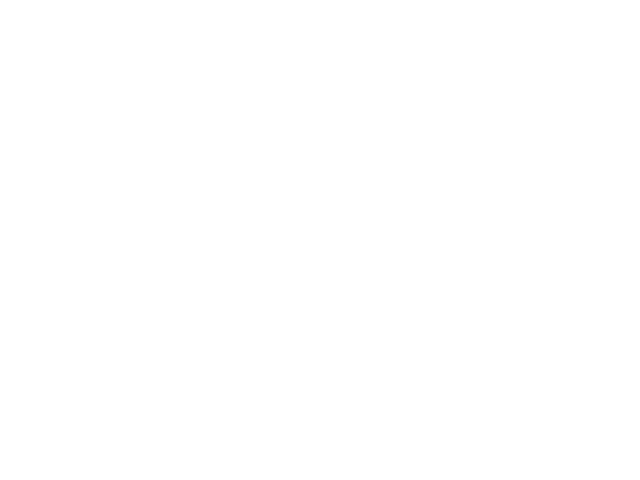

log loss for train data 0.02730356867221688
log loss for cv data 0.057790203487346314
log loss for test data 0.09769263073207214
Number of misclassified points  1.6559337626494939
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


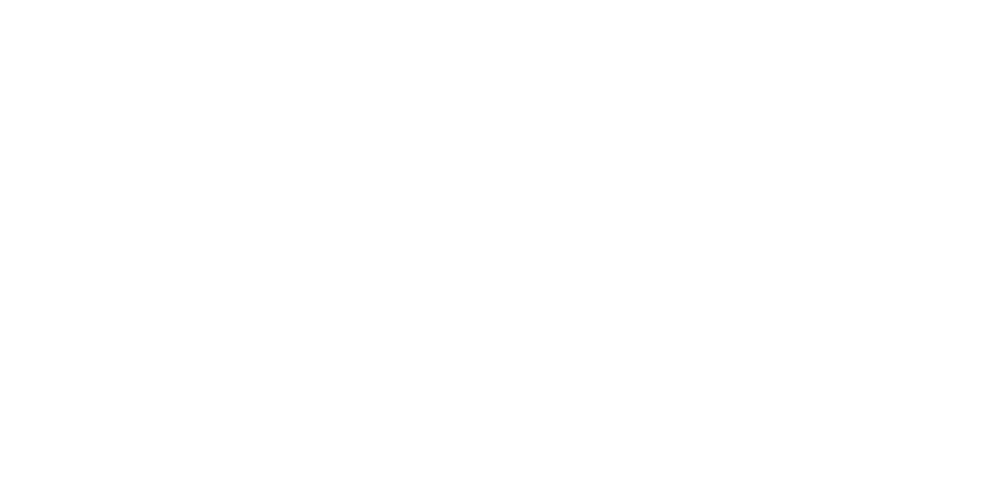

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


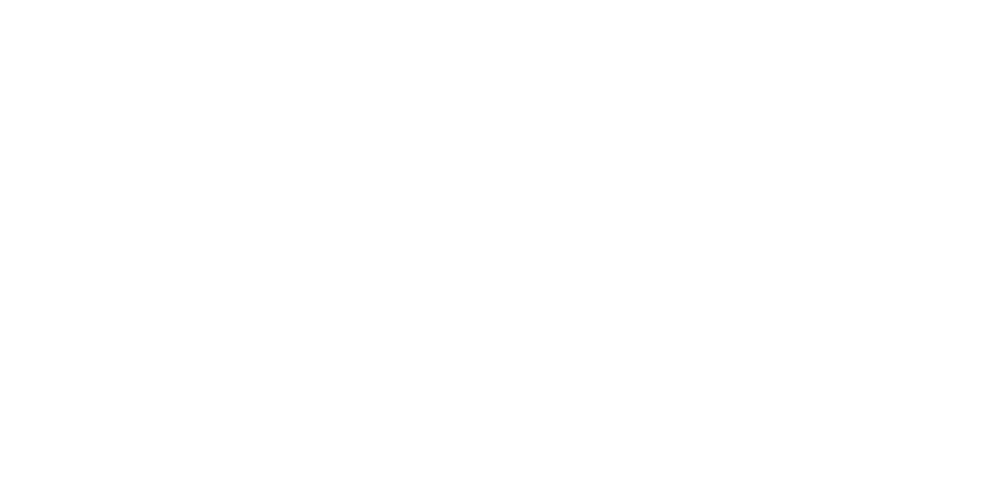

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


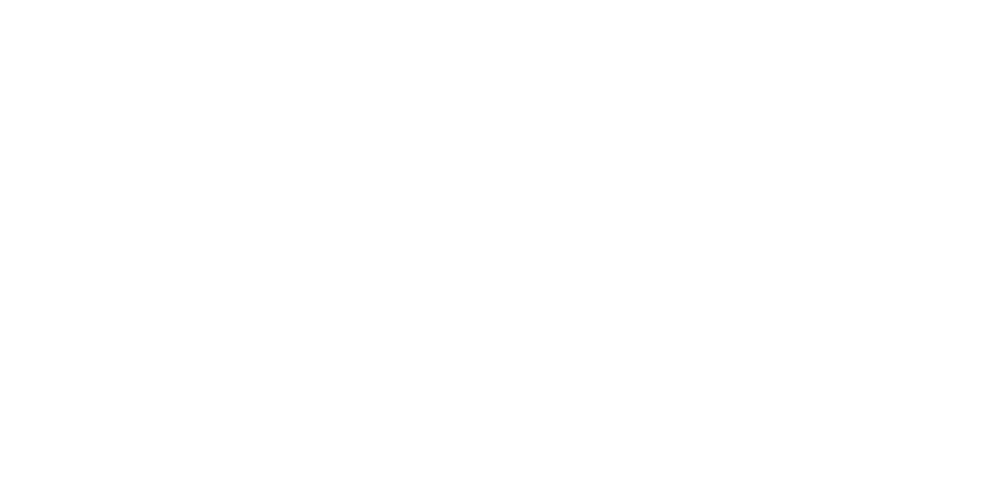

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.6055761460085234
log_loss for c =  0.0001 is 1.5639380687156217
log_loss for c =  0.001 is 1.3096195040641458
log_loss for c =  0.01 is 1.3378139497181403
log_loss for c =  0.1 is 1.1734216204810437
log_loss for c =  1 is 0.7463950117978878
log_loss for c =  10 is 0.4998489231570535
log_loss for c =  100 is 0.38840431656709146
log_loss for c =  1000 is 0.3104492364519796


<IPython.core.display.Javascript object>


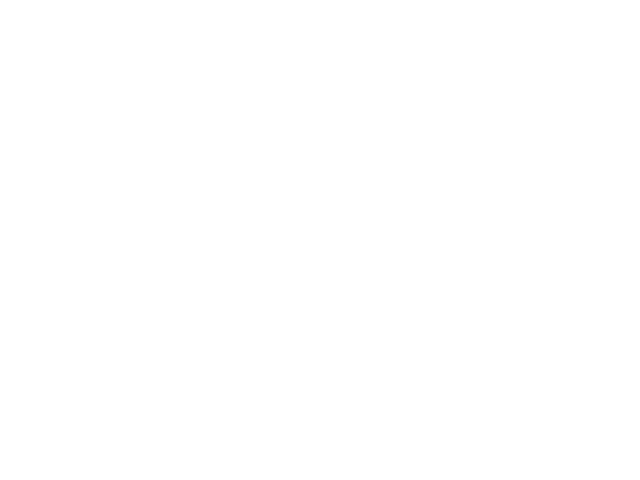

log loss for train data 0.306549337696636
log loss for cv data 0.3104492364519796
log loss for test data 0.3208474965246118
Number of misclassified points  6.39374425022999
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


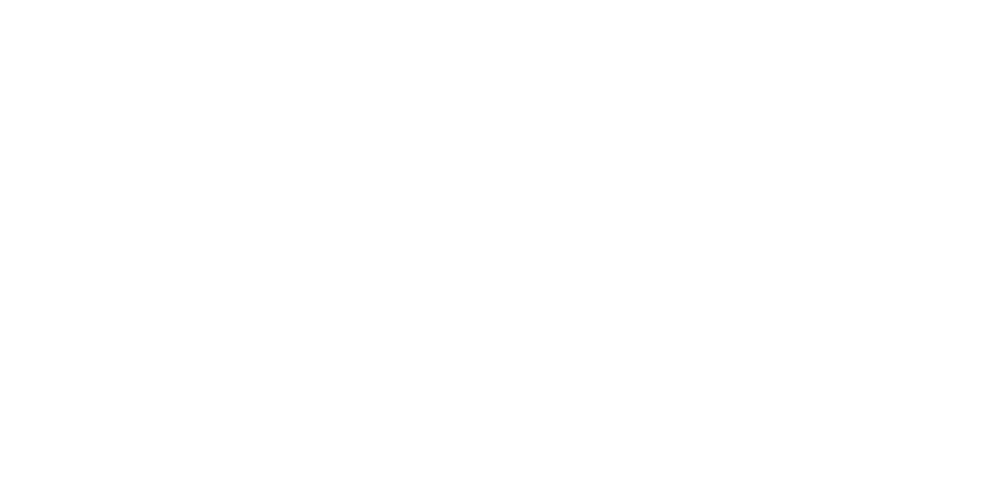

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


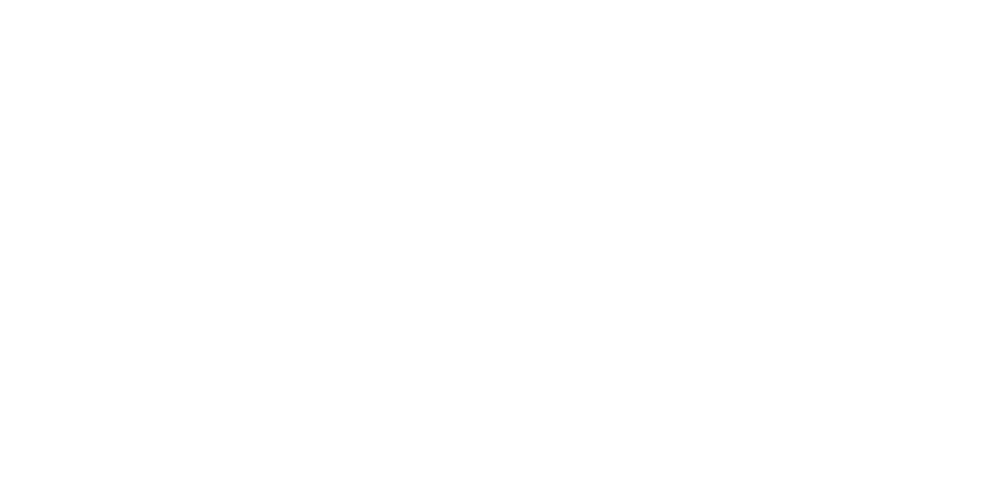

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


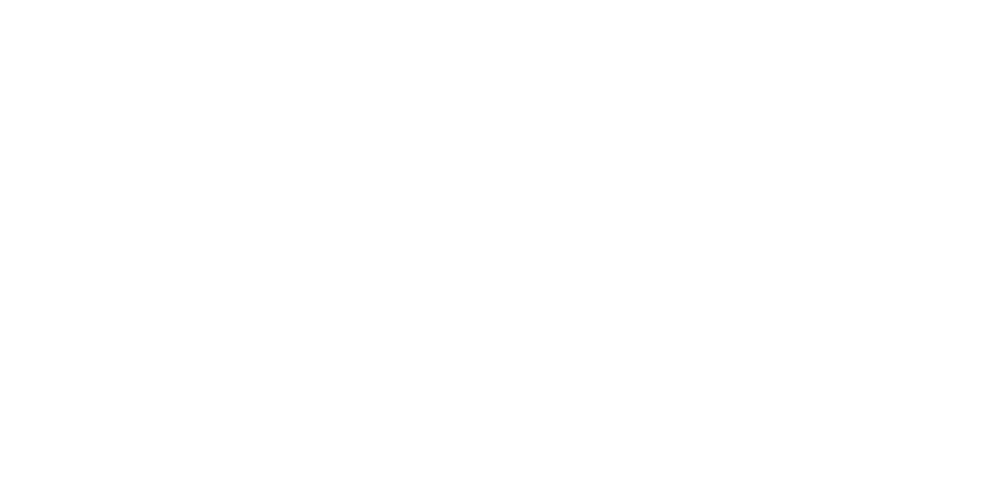

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.027096791679419252
log_loss for c =  50 is 0.02218809258189358
log_loss for c =  100 is 0.021177540593753374
log_loss for c =  500 is 0.020077968877239758
log_loss for c =  1000 is 0.02013453896715885
log_loss for c =  2000 is 0.020197298776636112
log_loss for c =  3000 is 0.020197419050552674


<IPython.core.display.Javascript object>


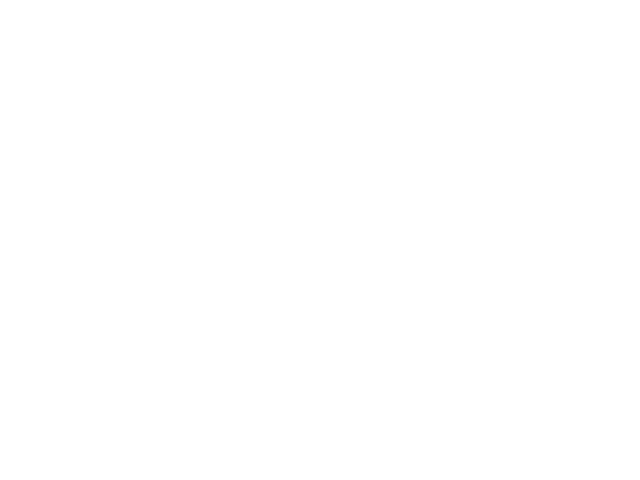

log loss for train data 0.014349453873898214
log loss for cv data 0.020077968877239758
log loss for test data 0.048885457020057914
Number of misclassified points  1.0579576816927323
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


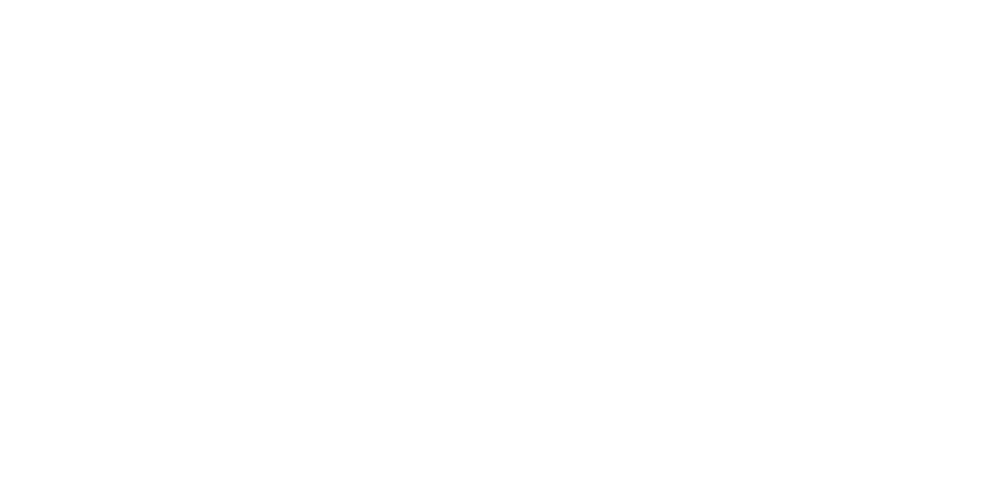

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


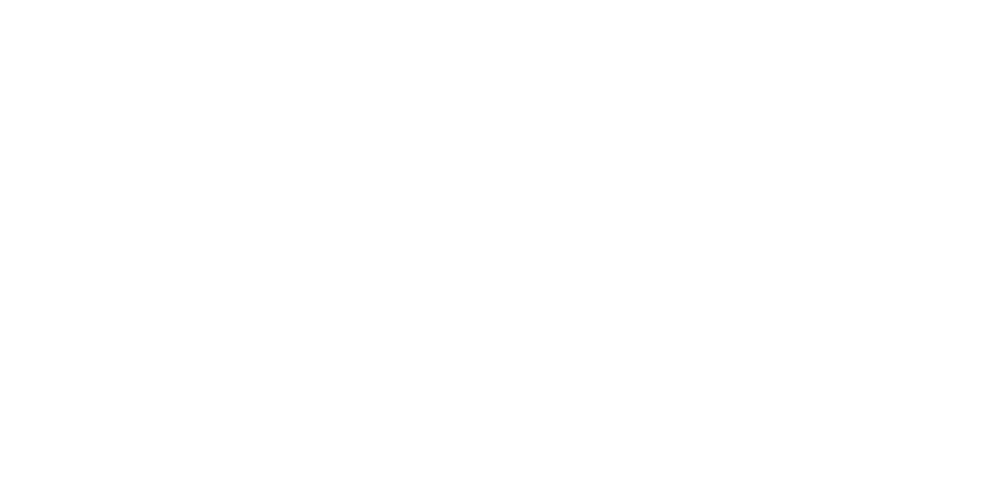

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


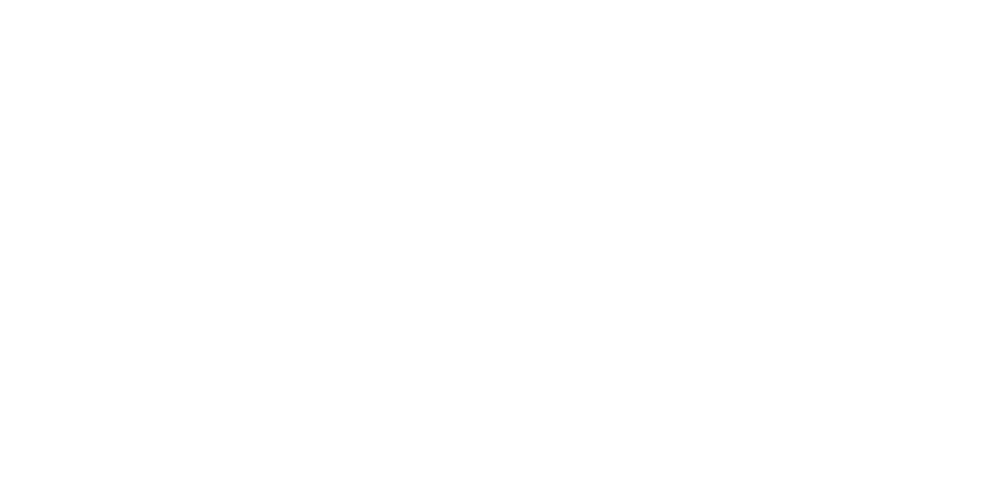

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.08783883338746723
log_loss for c =  50 is 0.032060859553591614
log_loss for c =  100 is 0.01942689020123503
log_loss for c =  500 is 0.017420812548639756
log_loss for c =  1000 is 0.016723487733909873
log_loss for c =  2000 is 0.01637432565426884
log_loss for c =  3000 is 0.01637857932744878


<IPython.core.display.Javascript object>


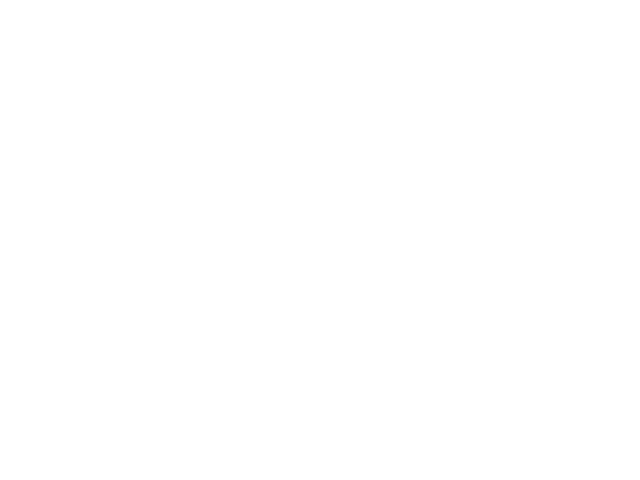

For values of best alpha =  2000 The train log loss is: 0.011485635369330848
For values of best alpha =  2000 The cross validation log loss is: 0.01637432565426884
For values of best alpha =  2000 The test log loss is: 0.03915498819124778
Number of misclassified points  0.5979760809567618
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


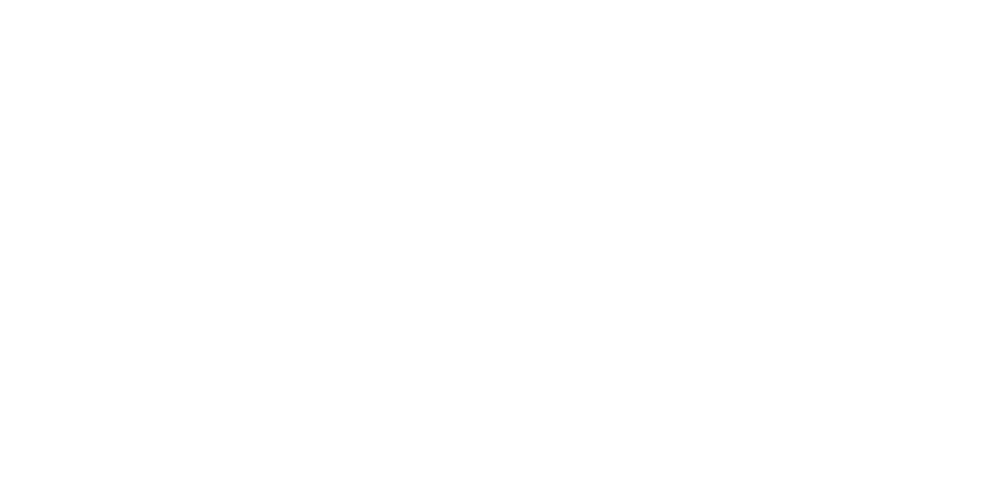

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


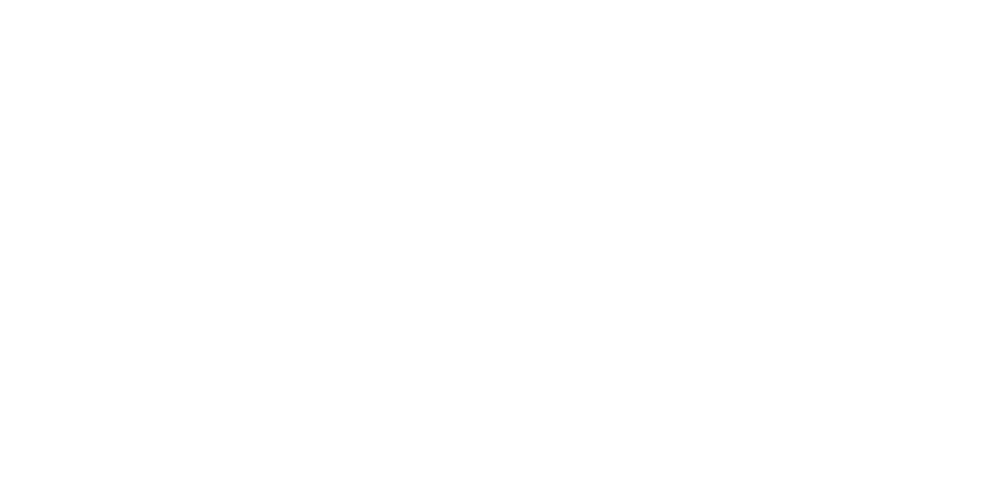

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


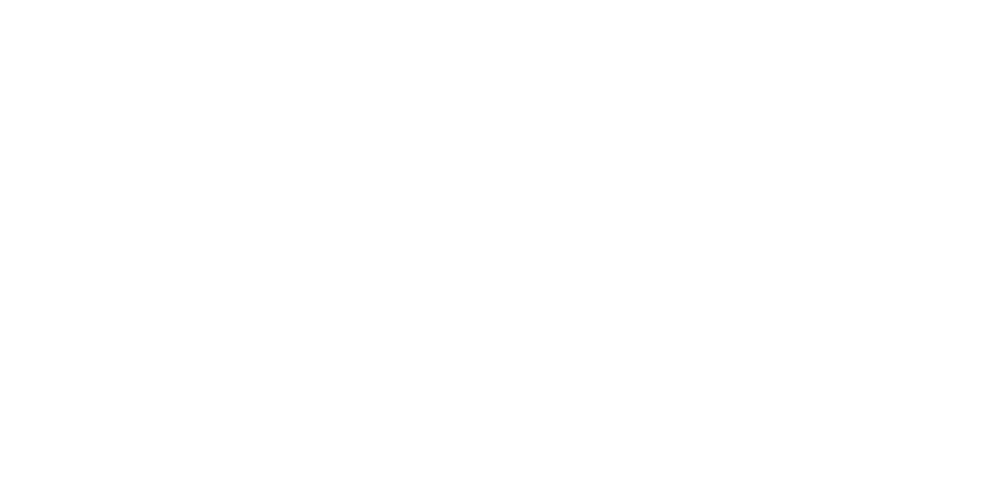

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [50]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.8min remaining:   18.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [51]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [52]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.012436477487619937
cv loss 0.016887325969990694
test loss 0.04305581477123653


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [22]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8    ...           f9        fa  \
0  0.001835  0.002058  0.002946  0.002638    ...     0.013560  0.013107   
1  0.003873  0.004747  0.006984  0.008267    ...     0.001920  0.001147   
2  0.005280  0.005078  0.002155  0.008104    ...     0.009804  0.011777   
3  0.000354  0.000310  0.000481  0.000959    ...     0.002121  0.001886   
4  0.000232  0.000148  0.000229  0.000376    ...     0.001530  0.000853   

         fb        fc        fd        fe        ff        ??  Class      size  
0  0.013634  0.031724  0.014549  0.014348  0.007843  0.000129      9  0.092219  
1  0.001329  0.087867  0.002432  0.088411  0.074851  0.000606      2  0.121236  
2  0.012604  0.028423  0.013080  0.013937  0.067001  0.000033      9  0.084499  
3  0.002272  0.013032  0.002211  0.003957  0.010904  0.000984      1  0.010759  
4  0.001052  0.007511  0.001038  0.001258  0.002998  0.000636      8  0.006233  

[5 rows x 260 columns]

In [23]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:    ...          esi       eax       ebx  \
0  0.000084      0.0  0.000072    ...     0.000746  0.000301  0.000360   
1  0.000000      0.0  0.000072    ...     0.000328  0.000965  0.000686   
2  0.000038      0.0  0.000072    ...     0.000475  0.000201  0.000560   
3  0.000000      0.0  0.000072    ...     0.000090  0.000281  0.000059   
4  0.000000      0.0  0.000072    ...     0.000102  0.000362  0.000243   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001057  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.000153  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.000178  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.000025  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.000064  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [24]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [17]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9 ...   :dword  edx   esi   eax   ebx  ecx  edi  \
0  0.002946  0.002638  0.003531 ...     4371  808  2290  1281   587  701    0   
1  0.006984  0.008267  0.000394 ...     1446  260  1090   391   905  420    0   
2  0.002155  0.008104  0.002707 ...      903    5   547     5   451   56    0   
3  0.000481  0.000959  0.000521 ...      137   18    66    15    43   83    0   
4  0.000229  0.000376  0.000246 ...     1220   18  1228    24  1546  107    0   

   ebp  esp  eip  
0   15   14  456  
1   24   22  227  
2   27    0  117  
3   17   48   29  
4   15    0   76  

[5 rows x 306 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


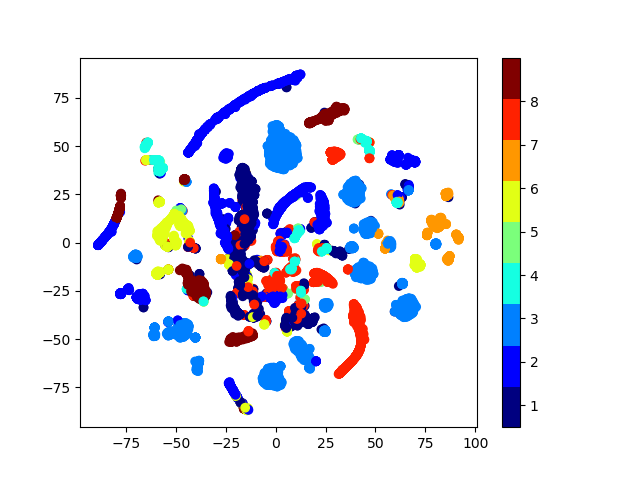

In [18]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [ ]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.05493948003278959
log_loss for c =  50 is 0.0518475076237933
log_loss for c =  100 is 0.05292678628835201
log_loss for c =  500 is 0.05140306285509439
log_loss for c =  1000 is 0.05092537439335411
log_loss for c =  2000 is 0.0507139563201554
log_loss for c =  3000 is 0.050771525049528164


<IPython.core.display.Javascript object>


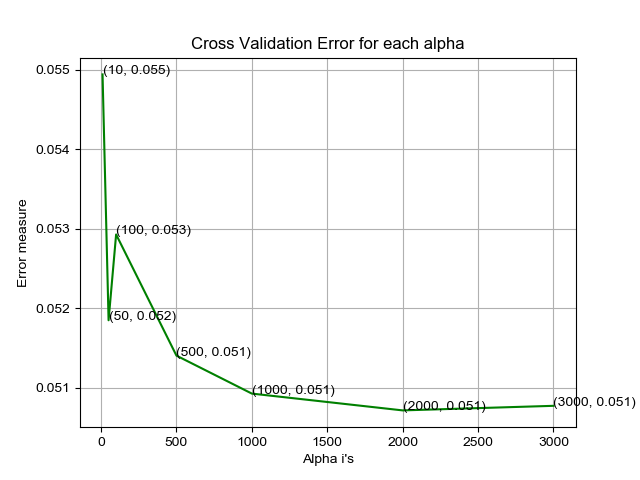

For values of best alpha =  2000 The train log loss is: 0.015808306583054568
For values of best alpha =  2000 The cross validation log loss is: 0.0507139563201554
For values of best alpha =  2000 The test log loss is: 0.035518140905318345


In [44]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.08797867027475288
log_loss for c =  50 is 0.047388819790909704
log_loss for c =  100 is 0.04084775603236589
log_loss for c =  500 is 0.040252364121444735
log_loss for c =  1000 is 0.040356675669871014
log_loss for c =  2000 is 0.040372692315599104
log_loss for c =  3000 is 0.04037214332507081


<IPython.core.display.Javascript object>


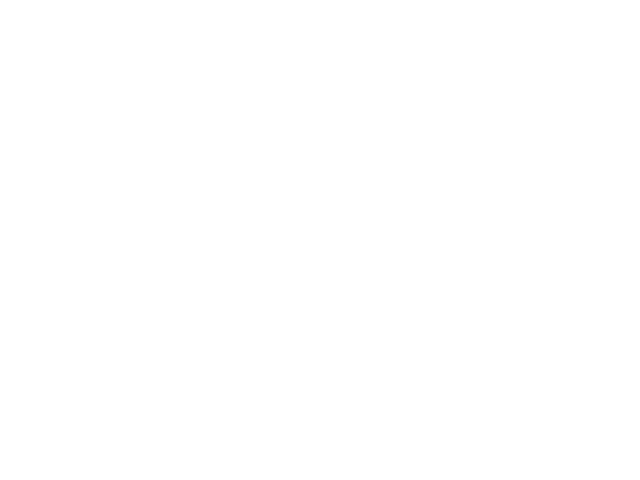

For values of best alpha =  500 The train log loss is: 0.012394642168665237
For values of best alpha =  500 The cross validation log loss is: 0.04037214332507081
For values of best alpha =  500 The test log loss is: 0.04278914578208932


In [60]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [61]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 14.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.4min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [62]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.3}


For values of best alpha =  500 The train log loss is: 0.01136774065160243
For values of best alpha =  500 The cross validation log loss is: 0.039132433739075774
For values of best alpha =  500 The test log loss is: 0.044696019027752026
Number of misclassified points  82.38270469181232
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


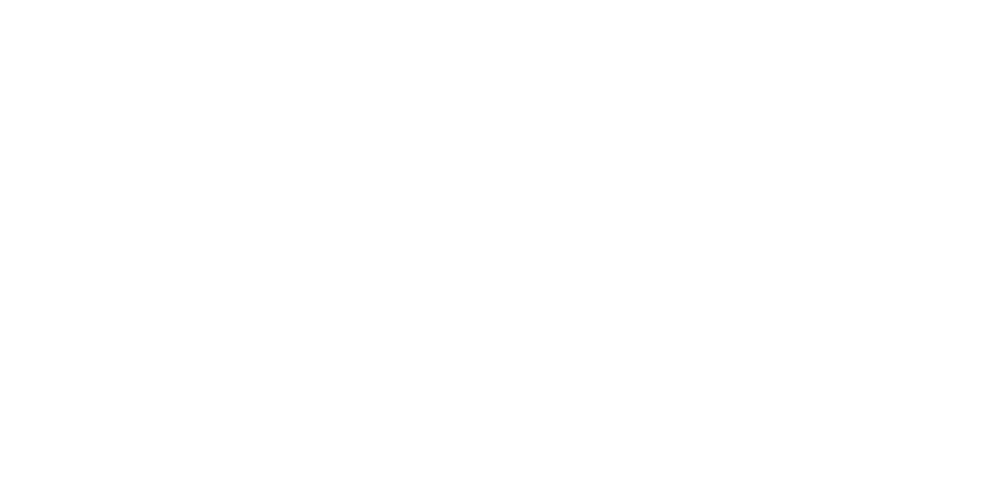

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


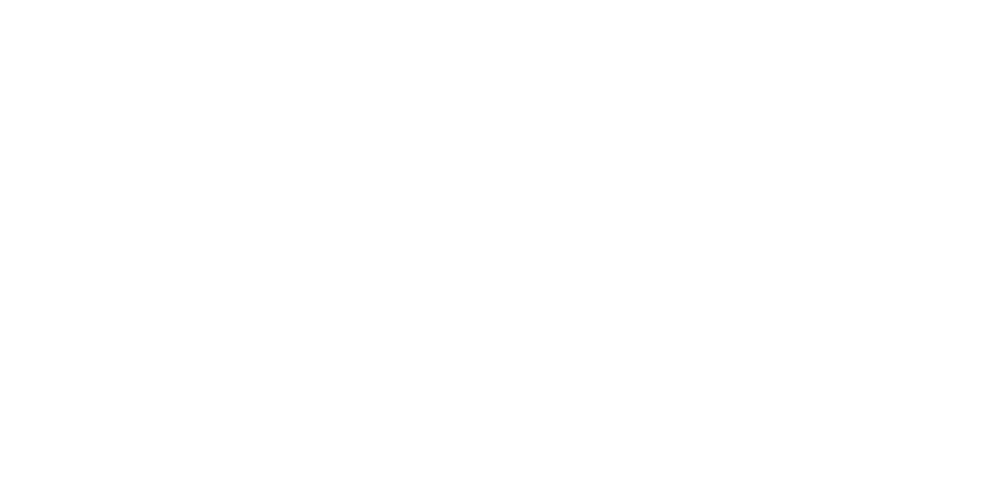

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


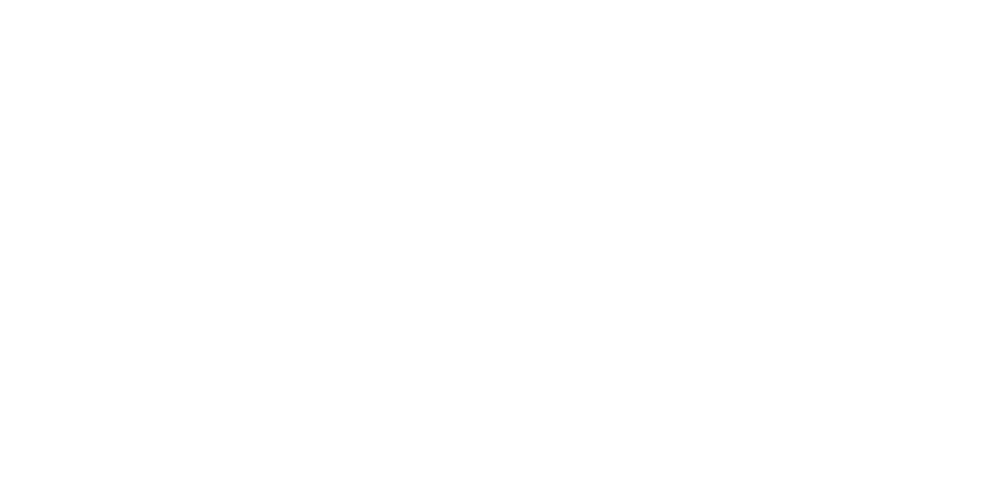

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [63]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) and include pixel intensity features to improve the logloss </li>
</ol>

In [29]:
s = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [30]:
# code source - http://www.albertauyeung.com/post/generating-ngrams-python/
import re

def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s?]', ' ', s)
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [31]:
byte = generate_ngrams(s, 2)

In [32]:
len(byte)

256

In [33]:
byte

['00 01',
 '01 02',
 '02 03',
 '03 04',
 '04 05',
 '05 06',
 '06 07',
 '07 08',
 '08 09',
 '09 0a',
 '0a 0b',
 '0b 0c',
 '0c 0d',
 '0d 0e',
 '0e 0f',
 '0f 10',
 '10 11',
 '11 12',
 '12 13',
 '13 14',
 '14 15',
 '15 16',
 '16 17',
 '17 18',
 '18 19',
 '19 1a',
 '1a 1b',
 '1b 1c',
 '1c 1d',
 '1d 1e',
 '1e 1f',
 '1f 20',
 '20 21',
 '21 22',
 '22 23',
 '23 24',
 '24 25',
 '25 26',
 '26 27',
 '27 28',
 '28 29',
 '29 2a',
 '2a 2b',
 '2b 2c',
 '2c 2d',
 '2d 2e',
 '2e 2f',
 '2f 30',
 '30 31',
 '31 32',
 '32 33',
 '33 34',
 '34 35',
 '35 36',
 '36 37',
 '37 38',
 '38 39',
 '39 3a',
 '3a 3b',
 '3b 3c',
 '3c 3d',
 '3d 3e',
 '3e 3f',
 '3f 40',
 '40 41',
 '41 42',
 '42 43',
 '43 44',
 '44 45',
 '45 46',
 '46 47',
 '47 48',
 '48 49',
 '49 4a',
 '4a 4b',
 '4b 4c',
 '4c 4d',
 '4d 4e',
 '4e 4f',
 '4f 50',
 '50 51',
 '51 52',
 '52 53',
 '53 54',
 '54 55',
 '55 56',
 '56 57',
 '57 58',
 '58 59',
 '59 5a',
 '5a 5b',
 '5b 5c',
 '5c 5d',
 '5d 5e',
 '5e 5f',
 '5f 60',
 '60 61',
 '61 62',
 '62 63',
 '63 64',


In [30]:
byte_bi_vocab = """00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"""

In [31]:
byte_bigram_vocab = []
def byte_bigram():
    #byte_bigram_vocab = []
    for x, y in enumerate(byte_bi_vocab.split(',')):
        for z in range(0, len(byte_bi_vocab.split(','))):
            byte_bigram_vocab.append(y + ' ' +byte_bi_vocab.split(',')[z])
    return len(byte_bigram_vocab)

In [32]:
byte_bigram()

66049

In [33]:
byte_bigram_vocab[:3]

['00 00', '00 01', '00 02']

In [38]:
import os 
os.getcwd()

'D:\\malware'

In [39]:
%cd D:\\malware

D:\malware


In [40]:
os.getcwd()

'D:\\malware'

## Do not re-run below two cell 

In [104]:
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy
vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
for i, file in tqdm(enumerate(os.listdir('byteFiles'))):
    f = open('byteFiles/' + file)
    bytebigram_vect[i,:]+= scipy.sparse.csr_matrix(vec.fit_transform([f.read().replace('\n', ' ').lower()]))
    f.close()

10868it [33:49:34, 11.20s/it] 


In [ ]:
scipy.sparse.save_npz('byte_bigram.npz', bytebigram_vect)

In [19]:
from sklearn.preprocessing import normalize
import scipy
byte_bi_vec = normalize(scipy.sparse.load_npz('byte_bigram.npz'), axis = 0)

In [28]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_indx[:keep]

In [34]:
byte_bi_indxes = imp_features(normalize(byte_bi_vec, axis = 0), byte_bigram_vocab, 300)

In [35]:
byte_bi_indxes

array([63135, 41932, 19504, 52725, 59502, 60184, 33107,  4119, 38942,
       50950, 65604, 43213, 54966, 55472, 62116, 63088,  2989, 12224,
       62056,  7821, 20280, 63617,     8, 39200, 62089, 63105, 38941,
       10734, 39092, 58506,  7560, 10168, 62334, 36647, 11186, 12223,
       34922, 11224, 38797,  6509, 52215, 56872, 57324, 56923,  6790,
       12225, 26139, 48040, 33017, 11401, 34447, 64165, 58484, 62435,
       53990, 11017, 20277, 33615,  8080, 30828, 10838, 23374, 62234,
       18464, 58482, 62352, 58527, 59019, 61558, 58508, 31385, 58937,
       38850, 62628, 37759, 62316, 12003, 64717, 63619, 37826, 41879,
       36132, 39559, 58504, 37516, 55326, 44703,  6522, 62359, 57129,
       56018, 62631,  7092, 38535, 61545, 26709, 43642, 44771, 44126,
         105, 10404, 57779, 65620, 18248, 35978, 21128, 30590,  3388,
        4637, 50221, 17741, 47802, 35959, 35472, 50254, 34181, 17619,
       65018, 19797, 27242, 22873, 30695,  4128, 58946, 22093,   111,
       12085, 50115,

In [36]:
np.save('byte_bi_indx', byte_bi_indxes)

In [37]:
byte_bi_indxes = np.load('byte_bi_indx.npy')

In [47]:
top_byte_bi = np.zeros((10868, 0))
for i in byte_bi_indxes:
    sliced = byte_bi_vec[:, i].todense()
    top_byte_bi = np.hstack([top_byte_bi, sliced])

In [48]:
byte_bi_df = pd.SparseDataFrame(top_byte_bi, columns = np.take(byte_bigram_vocab, byte_bi_indxes))

In [49]:
byte_bi_df.to_dense().to_csv('byte_bi.csv')

In [53]:
byte_bi_df = pd.read_csv('byte_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [54]:
byte_bi_df['ID'] = result.ID

In [55]:
byte_bi_df.head()

f1 86     1f 71     f1 b3     a2 ea     cb 1e     ee 58     31 89  \
0  0.005295  0.000067  0.008667  0.008217  0.000510  0.000835  0.000307   
1  0.000000  0.000000  0.000000  0.000000  0.000510  0.000000  0.000077   
2  0.005295  0.000056  0.003250  0.005135  0.151488  0.000626  0.000384   
3  0.001059  0.000011  0.002167  0.000000  0.000510  0.000000  0.000537   
4  0.000000  0.000011  0.000000  0.001027  0.001020  0.000104  0.000230   

      44 8e     0a 2d     12 0b          ...              6d 00     13 8b  \
0  0.000087  0.000033  0.000144          ...           0.012699  0.000902   
1  0.000362  0.000265  0.052763          ...           0.000233  0.000045   
2  0.000050  0.000099  0.000108          ...           0.001577  0.001940   
3  0.000000  0.000066  0.000000          ...           0.000657  0.000541   
4  0.000000  0.000000  0.000000          ...           0.000010  0.000045   

      f4 38     d6 00     69 00     3e 0d     d2 3a     52 00     e2 00  \
0  0.013709  0.010667  0.009839  0.000356  0.000421  0.011686  0.043826   
1  0.000000  0.000017  0.000216  0.000000  0.000047  0.000024  0.000115   
2  0.007834  0.001201  0.001266  0.000499  0.000140  0.001211  0.005838   
3  0.000979  0.000128  0.001257  0.000071  0.000047  0.000311  0.000115   
4  0.000000  0.000000  0.000019  0.000071  0.000000  0.000223  0.000038   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

In [56]:
byte_bi_df_1 = byte_bi_df.drop("ID", axis=1)

In [57]:
byte_bi_df_1

f1 86     1f 71     f1 b3     a2 ea     cb 1e     ee 58     31 89  \
0      0.005295  0.000067  0.008667  0.008217  0.000510  0.000835  0.000307   
1      0.000000  0.000000  0.000000  0.000000  0.000510  0.000000  0.000077   
2      0.005295  0.000056  0.003250  0.005135  0.151488  0.000626  0.000384   
3      0.001059  0.000011  0.002167  0.000000  0.000510  0.000000  0.000537   
4      0.000000  0.000011  0.000000  0.001027  0.001020  0.000104  0.000230   
5      0.003177  0.000000  0.001083  0.000000  0.000510  0.000209  0.000154   
6      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000768   
7      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000844   
8      0.002118  0.000022  0.001083  0.000000  0.000510  0.000104  0.000077   
9      0.000000  0.000011  0.000000  0.000000  0.000000  0.000104  0.046054   
10     0.000000  0.000000  0.001083  0.000000  0.000510  0.000104  0.000844   
11     0.014826  0.000100  0.011918  0.002054  0.002550  0.000835  0.000768   
12     0.014826  0.000266  0.017335  0.014379  0.009181  0.002817  0.001996   
13     0.013767  0.000155  0.018418  0.014379  0.005101  0.000939  0.000691   
14     0.001059  0.000011  0.001083  0.002054  0.000510  0.000104  0.000307   
15     0.000000  0.000000  0.002167  0.000000  0.000000  0.000000  0.000077   
16     0.001059  0.000000  0.001083  0.001027  0.000000  0.000104  0.000000   
17     0.010590  0.000133  0.011918  0.015406  0.008161  0.001252  0.001228   
18     0.008472  0.000122  0.008667  0.015406  0.007651  0.001356  0.001151   
19     0.000000  0.000011  0.000000  0.000000  0.000000  0.000000  0.000844   
20     0.000000  0.000011  0.003250  0.001027  0.000510  0.000000  0.000000   
21     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000844   
22     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.023334   
23     0.005295  0.000089  0.003250  0.007190  0.001020  0.000626  0.000921   
24     0.002118  0.000033  0.001083  0.000000  0.001530  0.000209  0.000921   
25     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000921   
26     0.002118  0.000000  0.000000  0.000000  0.000000  0.000104  0.000844   
27     0.011649  0.000233  0.009751  0.010271  0.008671  0.001148  0.000844   
28     0.013767  0.000100  0.014084  0.012325  0.006631  0.001252  0.001151   
29     0.011649  0.000122  0.015168  0.013352  0.007141  0.001565  0.000768   
...         ...       ...       ...       ...       ...       ...       ...   
10838  0.000000  0.000000  0.000000  0.000000  0.000510  0.000104  0.000000   
10839  0.001059  0.000011  0.001083  0.001027  0.000510  0.000104  0.000000   
10840  0.000000  0.000011  0.001083  0.001027  0.001530  0.000000  0.000154   
10841  0.000000  0.000011  0.001083  0.001027  0.000000  0.000000  0.000154   
10842  0.000000  0.000000  0.000000  0.000000  0.001530  0.000000  0.000000   
10843  0.003177  0.000022  0.000000  0.002054  0.000510  0.000313  0.000154   
10844  0.002118  0.000011  0.002167  0.000000  0.000510  0.000000  0.000230   
10845  0.000000  0.000022  0.000000  0.003081  0.001020  0.000104  0.000154   
10846  0.001059  0.000111  0.004334  0.001027  0.002040  0.000522  0.000384   
10847  0.006354  0.000033  0.002167  0.005135  0.001530  0.000522  0.000230   
10848  0.004236  0.000033  0.003250  0.002054  0.002040  0.000000  0.000077   
10849  0.000000  0.000000  0.001083  0.002054  0.001020  0.000000  0.000077   
10850  0.002118  0.000022  0.006500  0.005135  0.002040  0.000417  0.000154   
10851  0.000000  0.000000  0.001083  0.001027  0.000000  0.000000  0.000000   
10852  0.000000  0.000011  0.002167  0.003081  0.001530  0.000209  0.000000   
10853  0.001059  0.000000  0.001083  0.000000  0.000000  0.000000  0.000000   
10854  0.000000  0.000022  0.001083  0.000000  0.000510  0.000209  0.000154   
10855  0.002118  0.000000  0.000000  0.000000  0.001530  0.000209  0.000077   
10856  0.002118  0.000011  0.001083  0.001027  0.000000  0.0

### Bi-grams on ASM FIles 

In [43]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [44]:
asm_bigram_vocab = []
def asm_bigram():
    #byte_bigram_vocab = []
    for x, y in enumerate(opcodes):
        for z in range(0, len(opcodes)):
            asm_bigram_vocab.append(y + ' ' + opcodes[z])
    return len(asm_bigram_vocab)

In [45]:
asm_bigram()

676

In [46]:
asm_bigram_vocab[:3]

['jmp jmp', 'jmp mov', 'jmp retf']

In [115]:
os.getcwd()

'D:\\malware'

In [117]:
def opcode_collect():
    op_file = open("opcode_file.txt", "w+")
    for asmfile in tqdm(os.listdir('asmFiles')):
        opcode_str = ""
        with codecs.open('asmFiles/' + asmfile, encoding='cp1252', errors ='replace') as file:
            for lines in file:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
opcode_collect()

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [5:23:26<00:00,  1.79s/it]


In [122]:
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy
vec = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=asm_bigram_vocab)
asm_bi_vec = scipy.sparse.csr_matrix((10868, len(asm_bigram_vocab)))
for i in tqdm(range(10868)):
    raw = open('opcode_file.txt').read().split('\n')
    asm_bi_vec[i, :] += scipy.sparse.csr_matrix(vec.transform([raw[i]]))

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [8:30:25<00:00,  2.82s/it]


In [123]:
scipy.sparse.save_npz('asm_bigram.npz', asm_bi_vec)

In [47]:
from sklearn.preprocessing import normalize
import scipy
asm_bi_vec = normalize(scipy.sparse.load_npz('asm_bigram.npz'), axis = 0)

In [48]:
asm_bi_indx = imp_features(normalize(asm_bi_vec, axis = 0), asm_bigram_vocab, 300)

In [49]:
asm_bi_indx

array([ 30, 432, 458, 159, 373,  26, 573, 290, 438, 437, 287, 302, 274,
        27,  50,  37, 625, 252, 131, 224, 477, 136,   3, 453,  51,  48,
        43, 588,  10, 442, 209, 232, 445, 417, 108, 115, 492, 110, 466,
       157, 628, 268,   1,  34, 235,  81,   5, 446, 658, 580, 134, 292,
       547, 365,  16,  36,  32, 130,  42,  41, 133, 627, 156, 211, 112,
       464, 146,   0, 447, 416, 596, 448,  79, 641, 443, 261,  96, 226,
       650, 440,  29, 581,  22, 380, 664, 250, 575, 161,  38, 594, 469,
       666, 655, 238, 382,  24, 456, 234, 582, 208, 303, 468, 248, 405,
       421, 107, 289, 218, 427,  86,   8, 102,  95, 313, 121,  35, 172,
       589, 430, 341,  11,  25, 638,  92, 310, 139, 635, 364, 225, 367,
       441, 375, 219, 572,  58, 105, 583, 419, 242, 651,  82, 404,  89,
       648, 264, 213, 297,  31, 632,  88, 369, 138,  54, 212, 300, 675,
       646,  83, 284,  44, 425,  40, 118, 155,  17, 562,  87, 640,   4,
       412, 222, 286, 158, 577,  94,  53,  84, 338, 342, 109, 14

In [50]:
np.save('asm_bi_indx',asm_bi_indx)

In [21]:
asm_bi_indxes = np.load('asm_bi_indx.npy')

In [52]:
top_asm_bi = np.zeros((10868, 0))
for i in asm_bi_indxes:
    sliced = asm_bi_vec[:, i].todense()
    top_asm_bi = np.hstack([top_asm_bi, sliced])

In [53]:
asm_bi_df = pd.SparseDataFrame(top_asm_bi, columns = np.take(asm_bigram_vocab, asm_bi_indxes))

In [54]:
asm_bi_df.to_dense().to_csv('asm_bi.csv')

In [22]:
asm_bi_df = pd.read_csv('asm_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [23]:
asm_bi_df['ID'] = result.ID

In [24]:
asm_bi_df.head()

mov pop   cmp cmp  call cmp  retn push  or inc   mov jmp    jz mov  \
0  0.004581  0.000922  0.008045   0.002184     0.0  0.003770  0.005517   
1  0.001497  0.000503  0.000380   0.000898     0.0  0.000777  0.000298   
2  0.000000  0.002432  0.000326   0.000748     0.0  0.000000  0.000000   
3  0.000091  0.000084  0.000109   0.000150     0.0  0.000069  0.000099   
4  0.000499  0.000168  0.000054   0.000569     0.0  0.001165  0.001290   

    add pop    cmp jz   cmp jnb          ...           xor call  ror add  \
0  0.001096  0.000126  0.000000          ...           0.005794      0.0   
1  0.000274  0.000461  0.003746          ...           0.000658      0.0   
2  0.000000  0.000587  0.000000          ...           0.000132      0.0   
3  0.000000  0.000063  0.000489          ...           0.000658      0.0   
4  0.000183  0.001613  0.002443          ...           0.000000      0.0   

   retf dec  jnb inc  add imul   inc inc  cmp retn  retn shl  call dec  \
0      0.00      0.0  0.000565  0.000000  0.000000       0.0       0.0   
1      0.00      0.0  0.000000  0.000038  0.005001       0.0       0.0   
2      0.01      0.0  0.000000  0.000000  0.000000       0.0       0.0   
3      0.00      0.0  0.000000  0.000000  0.000000       0.0       0.0   
4      0.00      0.0  0.000000  0.000000  0.000000       0.0       0.0   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

In [25]:
asm_bi_df = asm_bi_df.drop("ID", axis=1)

In [26]:
asm_bi_df.head()

mov pop   cmp cmp  call cmp  retn push  or inc   mov jmp    jz mov  \
0  0.004581  0.000922  0.008045   0.002184     0.0  0.003770  0.005517   
1  0.001497  0.000503  0.000380   0.000898     0.0  0.000777  0.000298   
2  0.000000  0.002432  0.000326   0.000748     0.0  0.000000  0.000000   
3  0.000091  0.000084  0.000109   0.000150     0.0  0.000069  0.000099   
4  0.000499  0.000168  0.000054   0.000569     0.0  0.001165  0.001290   

    add pop    cmp jz   cmp jnb    ...       jz pop  xor call  ror add  \
0  0.001096  0.000126  0.000000    ...     0.000568  0.005794      0.0   
1  0.000274  0.000461  0.003746    ...     0.000000  0.000658      0.0   
2  0.000000  0.000587  0.000000    ...     0.000000  0.000132      0.0   
3  0.000000  0.000063  0.000489    ...     0.000000  0.000658      0.0   
4  0.000183  0.001613  0.002443    ...     0.000000  0.000000      0.0   

   retf dec  jnb inc  add imul   inc inc  cmp retn  retn shl  call dec  
0      0.00      0.0  0.000565  0.000000  0.000000       0.0       0.0  
1      0.00      0.0  0.000000  0.000038  0.005001       0.0       0.0  
2      0.01      0.0  0.000000  0.000000  0.000000       0.0       0.0  
3      0.00      0.0  0.000000  0.000000  0.000000       0.0       0.0  
4      0.00      0.0  0.000000  0.000000  0.000000       0.0       0.0  

[5 rows x 300 columns]

In [60]:
asm_trigram_vocab = []
def asm_trigram():
    for x, y in enumerate(opcodes):
        for w in range(0, len(opcodes)):
            for z in range(0, len(opcodes)):
                asm_trigram_vocab.append(y + ' ' + opcodes[w] + ' ' + opcodes[z])
    return len(asm_trigram_vocab)

In [61]:
asm_trigram()

17576

In [127]:
tri_vec = CountVectorizer(lowercase=False,ngram_range=(3,3), vocabulary=asm_trigram_vocab)
asm_tri_vec = scipy.sparse.csr_matrix((10868, len(asm_trigram_vocab)))
for i in tqdm(range(10868)):
    raw = open('opcode_file.txt').read().split('\n')
    asm_tri_vec[i, :] += scipy.sparse.csr_matrix(tri_vec.transform([raw[i]]))

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [8:52:35<00:00,  2.94s/it]


In [128]:
scipy.sparse.save_npz('asm_trigram.npz', asm_tri_vec)

In [62]:
from sklearn.preprocessing import normalize
import scipy
asm_tri_vec = normalize(scipy.sparse.load_npz('asm_trigram.npz'), axis = 0)

In [63]:
asm_tri_indx = imp_features(normalize(asm_tri_vec, axis = 0), asm_trigram_vocab, 300)

In [64]:
asm_tri_indx

array([  713,  2863,   703,   908, 11782,  7463, 14899,  7543,   677,
       11363,  4085, 15310,   755,  2486,   797,  6971,  2520,  2783,
       11404,   719,  1058,   438, 11389, 11540,  4190, 14244,  5669,
        6035,  1301,  2814,   718,  2481,  9712, 14967,  1093,  2861,
         786,  5547, 14953,  2994,    37,  3157,   963,   784,   717,
         707,   960,  4135, 14898, 11253,  2071, 12184,  1251,  2055,
        2928,  1265, 11602,  6043,  2109,  6576, 16260,  1113,  7546,
        6037, 14914,   708,  7557,  4018,  7385,   720,  1153,  5542,
         807,  3492,  6048,   706,   885,  6297,   432,  6085,  7473,
         425,  3597,  6040, 11396,  2237,   596,  4083, 14909,   727,
        2799,  2130,  5435, 16253,  2492,  2149,  7879,  2478, 11542,
       14920,  2107, 17566,  3799,   765,  2474,  7710,  1317,   675,
         726,  4088,   705, 11649,  3279, 15336, 10847, 15325,  6046,
       12202,  1134,   926,  2921,  2812,  7853,  9706,  2752,   686,
        2317,  3336,

In [65]:
np.save('asm_tri_indx',asm_tri_indx)

In [66]:
top_asm_tri = np.zeros((10868, 0))
for i in asm_tri_indx:
    sliced = asm_tri_vec[:, i].todense()
    top_asm_tri = np.hstack([top_asm_tri, sliced])

In [67]:
asm_tri_df = pd.SparseDataFrame(top_asm_tri, columns = np.take(asm_trigram_vocab, asm_tri_indx))

In [68]:
asm_tri_df.to_dense().to_csv('asm_tri.csv')

In [27]:
asm_tri_df = pd.read_csv('asm_tri.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [28]:
asm_tri_df['ID'] = result.ID

In [29]:
asm_tri_df =  asm_tri_df.drop("ID", axis=1)

In [30]:
asm_tri_df.head()

mov mov add  pop retn push  mov mov mov  mov sub lea  call add pop  \
0     0.005770       0.001802     0.001211     0.001002      0.000000   
1     0.003435       0.001073     0.001544     0.002506      0.000251   
2     0.000000       0.000129     0.000000     0.003007      0.000000   
3     0.000000       0.000000     0.000010     0.000000      0.000000   
4     0.013433       0.000815     0.001047     0.000501      0.000000   

   add mov mov  jz mov mov  add pop push  mov jmp mov  cmp jnb mov  \
0     0.003593    0.003869      0.000000     0.004309     0.000000   
1     0.002705    0.000221      0.000000     0.001048     0.004019   
2     0.000000    0.000000      0.000000     0.000000     0.000000   
3     0.000000    0.000111      0.000000     0.000039     0.000670   
4     0.014009    0.001105      0.000441     0.001825     0.005024   

       ...       mov lea push  push push xor  jz jmp mov  mov xor cmp  \
0      ...           0.000750       0.011470    0.000000     0.005202   
1      ...           0.000346       0.000000    0.000000     0.000000   
2      ...           0.000115       0.003036    0.000000     0.000000   
3      ...           0.000115       0.000000    0.001077     0.000000   
4      ...           0.000231       0.000000    0.002154     0.000000   

   cmp cmp dec  cmp push pop  call add mov  or call mov  jz inc inc  \
0     0.000000      0.000000      0.000574     0.037923         0.0   
1     0.007292      0.000000      0.001434     0.000000         0.0   
2     0.000000      0.006449      0.000000     0.000000         0.0   
3     0.000000      0.000000      0.000000     0.000000         0.0   
4     0.000000      0.000000      0.000717     0.000000         0.0   

   mov call mov  
0      0.007183  
1      0.001122  
2      0.000000  
3      0.000065  
4      0.000000  

[5 rows x 300 columns]

In [73]:
asm_4gram_vocab = []
def asm_4gram():
    for x, y in enumerate(opcodes):
        for v in range(0, len(opcodes)):
            for w in range(0, len(opcodes)):
                for z in range(0, len(opcodes)):
                    asm_4gram_vocab.append(y + ' ' + opcodes[v] + ' ' + opcodes[w] + ' ' + opcodes[z])
    return len(asm_4gram_vocab)

In [74]:
asm_4gram()

456976

In [133]:
from tqdm.notebook import tqdm
import scipy
from sklearn.feature_extraction.text import CountVectorizer
four_vec = CountVectorizer(lowercase=False, ngram_range=(4,4), vocabulary=asm_4gram_vocab)
asm_4_vec = scipy.sparse.csr_matrix((10868, len(asm_4gram_vocab)))
for i in tqdm(range(10868)):
    raw = open('opcode_file.txt').read().split('\n')
    asm_4_vec[i, :] += scipy.sparse.csr_matrix(four_vec.transform([raw[i]]))

In [134]:
scipy.sparse.save_npz('asm_fourgram.npz', asm_4_vec)

In [75]:
asm_4_vec = normalize(scipy.sparse.load_npz('asm_fourgram.npz'), axis = 0)

In [76]:
asm_4_indx = imp_features(normalize(asm_4_vec, axis = 0), asm_4gram_vocab, 300)

In [77]:
asm_4_indx

array([ 23613,  82086,  23405,  19638,  27508,  23611, 106211, 370033,
        53636,  34555, 292579, 296323, 106159,  18279,  54783, 306335,
        23619,  25038, 429341, 301653,  71009,  29485, 306333,  23622,
       147161,  54851, 306349, 370361,  54785, 196667,  73169,  55220,
        18289, 438129, 108946, 249881,  23616,   6971,  99133, 299906,
        88583, 296183, 107563,  53441, 456738, 196135, 247120, 306648,
       432667, 314291,  72785,  19699,  28527,   2109,  18411, 387351,
        18827, 292054,  55209, 398466,  56212, 196197,  71612,  28980,
       246772,  34914, 258248,  58166,  24961, 247209, 252230,  53615,
        20388,  17603, 283687,  93540, 309635, 423140, 313759, 306338,
        64795,  23609, 156861,  23010,  85257,  53850, 306254,  18253,
       283372,  17566,  18690,  74387,  71075,  18513,  74389,  29771,
        32488,  18281, 142717, 427313, 107527, 196142,  29095, 301786,
        55201,  90600,  91032, 185466,  23697, 156882,  21399,  55215,
      

In [78]:
np.save('asm_4_indx', asm_4_indx)

In [79]:
asm_4_indx = np.load('asm_4_indx.npy')

In [80]:
top_asm_four = np.zeros((10868, 0))
for i in asm_4_indx:
    sliced = asm_4_vec[:, i].todense()
    top_asm_four = np.hstack([top_asm_four, sliced])

In [81]:
asm_4_df = pd.SparseDataFrame(top_asm_four, columns = np.take(asm_4gram_vocab, asm_4_indx))

In [83]:
asm_4_df.to_dense().to_csv('asm_4_df.csv')

In [31]:
asm_4_df = pd.read_csv('asm_4_df.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [32]:
asm_4_df['ID'] = result.ID

In [33]:
asm_4_df = asm_4_df.drop("ID", axis=1)

In [34]:
asm_4_df.head()

mov sub lea xor  pop call add pop  mov sub cmp xor  mov push mov sub  \
0         0.005011               0.0              0.0          0.001617   
1         0.000000               0.0              0.0          0.000147   
2         0.000000               0.0              0.0          0.000000   
3         0.000000               0.0              0.0          0.000147   
4         0.000000               0.0              0.0          0.000000   

   mov or shl jmp  mov sub lea push  retn mov push mov  jnb mov dec mov  \
0             0.0          0.000000           0.000286              0.0   
1             0.0          0.000000           0.000906              0.0   
2             0.0          0.009915           0.000000              0.0   
3             0.0          0.000000           0.000000              0.0   
4             0.0          0.001652           0.000000              0.0   

   push mov sub lea  mov movzx push mov        ...          dec or inc push  \
0          0.000000                 0.0        ...                      0.0   
1          0.000000                 0.0        ...                      0.0   
2          0.003646                 0.0        ...                      0.0   
3          0.000000                 0.0        ...                      0.0   
4          0.000000                 0.0        ...                      0.0   

   mov add mov dec  inc mov mov dec  push mov sub mov  pop retn push retn  \
0              0.0              0.0          0.000886                 0.0   
1              0.0              0.0          0.000000                 0.0   
2              0.0              0.0          0.000000                 0.0   
3              0.0              0.0          0.000665                 0.0   
4              0.0              0.0          0.003989                 0.0   

   jz mov mov jmp  call cmp mov cmp  cmp jnb mov push  retn mov mov or  \
0             0.0               0.0          0.000000         0.012863   
1             0.0               0.0          0.013954         0.012863   
2             0.0               0.0          0.000000         0.000000   
3             0.0               0.0          0.000000         0.000000   
4             0.0               0.0          0.003489         0.000000   

   mov push call mov  
0           0.003278  
1           0.000372  
2           0.000000  
3           0.000074  
4           0.006928  

[5 rows x 300 columns]

In [74]:
result_x1 = byte_bi_df_1
result_y = data_y

### Train & test split

In [75]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x1, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [76]:
X_train.shape, y_train.shape

((8694, 300), (8694,))

### Random Forest Classifier on byte bi-grams Files

log_loss for c =  10 is 0.06105454136327116
log_loss for c =  50 is 0.05240544371971374
log_loss for c =  100 is 0.052910707678592864
log_loss for c =  500 is 0.049784618923179064
log_loss for c =  1000 is 0.04989981654166991
log_loss for c =  2000 is 0.049916409716371374
log_loss for c =  3000 is 0.049878502512113045


<IPython.core.display.Javascript object>


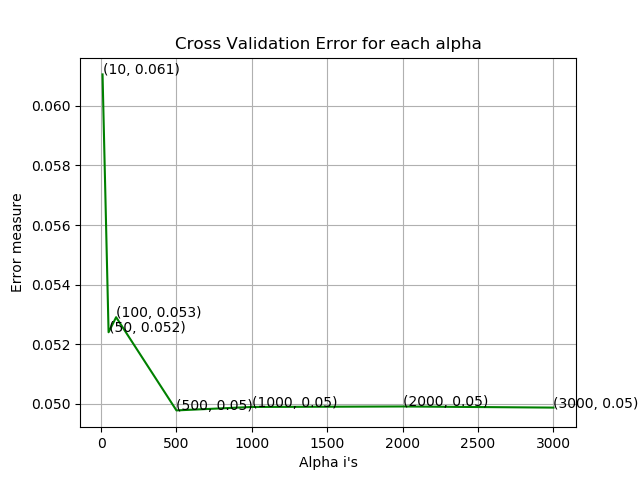

In [77]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

### Random Forest Classifier On Bytes Bi-gram

log_loss for c =  10 is 0.06105454136327116
log_loss for c =  50 is 0.05240544371971374
log_loss for c =  100 is 0.052910707678592864
log_loss for c =  500 is 0.049784618923179064
log_loss for c =  1000 is 0.04989981654166991
log_loss for c =  2000 is 0.049916409716371374
log_loss for c =  3000 is 0.049878502512113045


<IPython.core.display.Javascript object>


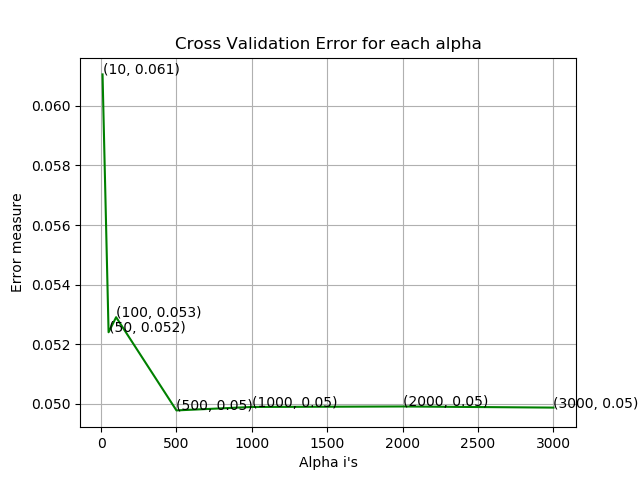

In [78]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.017321593486531485
log loss for cv data 0.049784618923179064
log loss for test data 0.042919980811460784
Number of misclassified points  0.8279668813247469
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


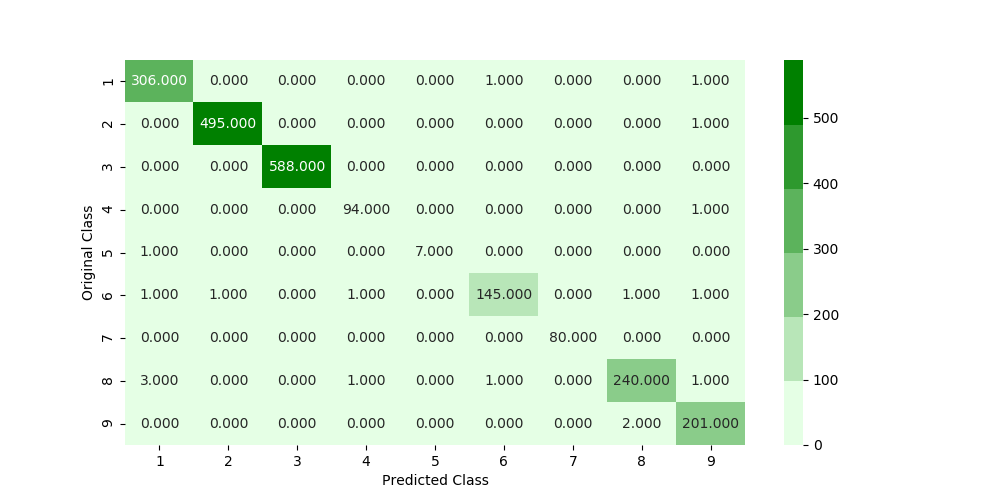

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


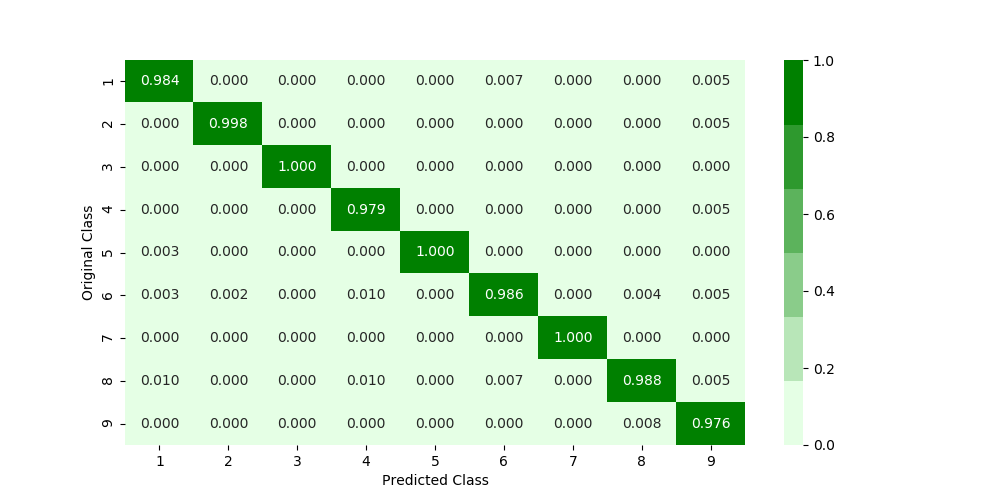

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


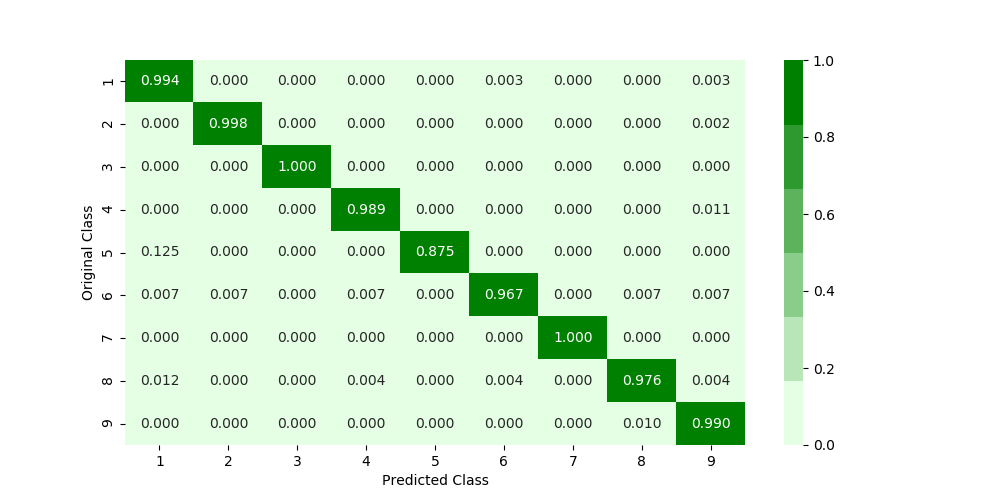

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [79]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
predict_y = sig_clf.predict_proba(X_train_merge)
print ('log loss for train data',(log_loss(y_train_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ('log loss for cv data',(log_loss(y_cv_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_merge)
print ('log loss for test data',(log_loss(y_test_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

### HyperParameter Tuned XGBoost on Byte Bi-gram Files

In [80]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  9.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.9min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [81]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.5}


In [82]:
x_cfl=XGBClassifier(n_estimators=500, learning_rate=0.2, colsample_bytree=0.5, max_depth=5, subsample=0.5, n_jobs=-1)
x_cfl.fit(X_train_merge, y_train_merge)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_merge, y_train_merge)

predict_y = c_cfl.predict_proba(X_train_merge)
print ('train loss',log_loss(y_train_merge, predict_y))
predict_y = c_cfl.predict_proba(X_cv_merge)
print ('cv loss',log_loss(y_cv_merge, predict_y))
predict_y = c_cfl.predict_proba(X_test_merge)
print ('test loss',log_loss(y_test_merge, predict_y))

train loss 0.015682084702440886
cv loss 0.04869234506218092
test loss 0.04340585792521129


Number of misclassified points  0.6899724011039559
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


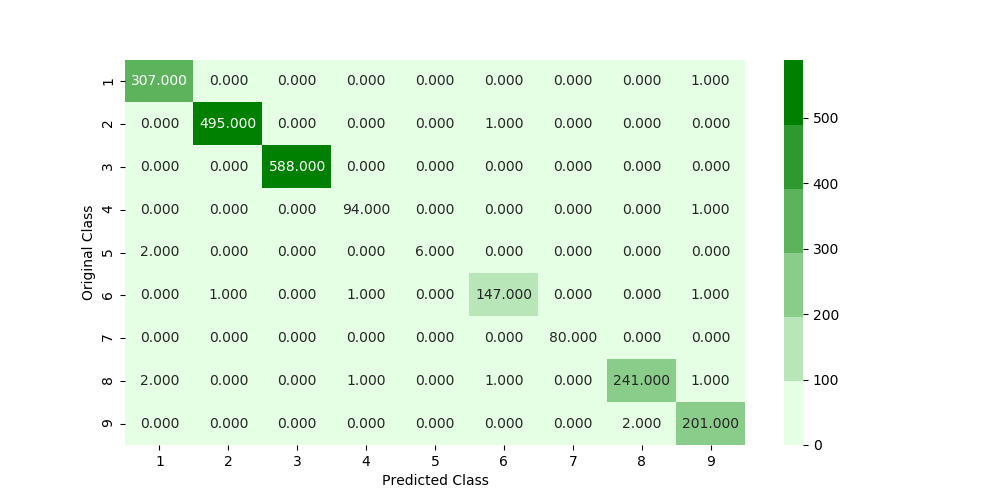

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


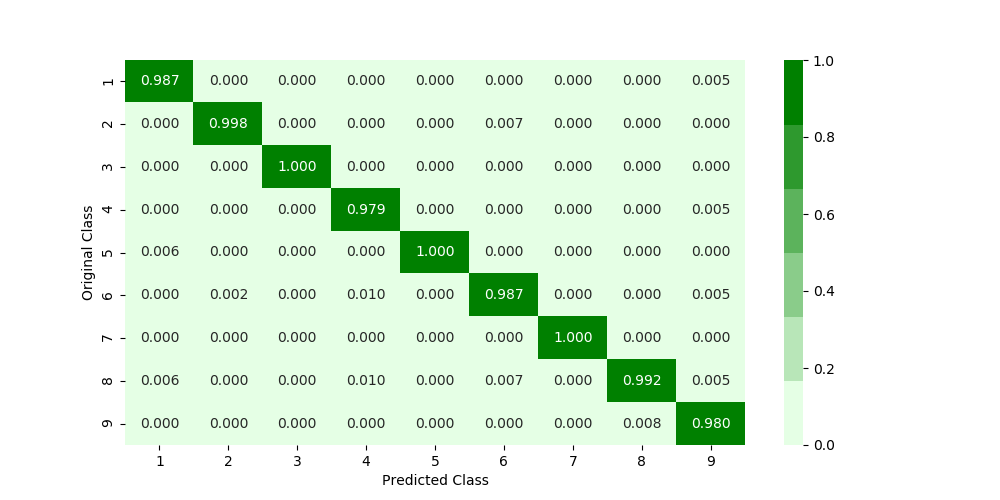

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


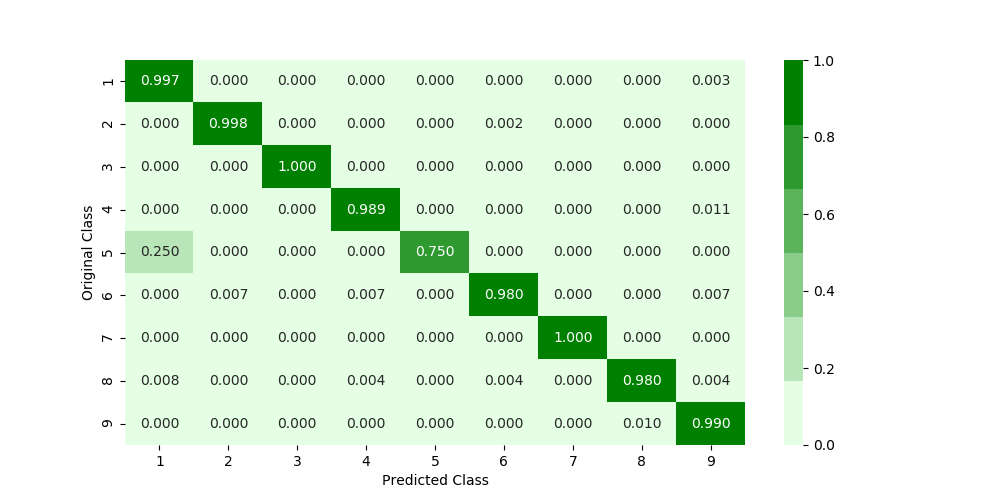

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [83]:
plt.close()
plot_confusion_matrix(y_test_merge,c_cfl.predict(X_test_merge))

### Extracing Image Features from ASM Files 

## Do not re-run this cell

In [69]:
#code source - https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79

import time,array
import imageio


for afile in tqdm(os.listdir("asmFiles"), position=0, leave=True):
        start_time = time.time()  
        asm_file_name = afile.split('.')[0]
        file = codecs.open("asmFiles/" + afile, 'rb')
        asm_file_len = os.path.getsize("asmFiles/" + afile)

        width = int(asm_file_len ** 0.5)
        rem = int(asm_file_len / width)

        imgarr = array.array('B')
        imgarr.frombytes(file.read())

        file.close()
        re_img = np.reshape(imgarr[:width * width], (width, width))
        re_img = np.uint8(re_img)

        imageio.imwrite('asmImage/' + asm_file_name + '.png',re_img)
print('File conversion Successful!!!')

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [3:10:03<00:00,  1.05s/it]


File conversion Successful!!!


In [61]:
!pip install pillow

thinc 6.10.3 requires msgpack<1.0.0,>=0.5.6, which is not installed.
msgpack-numpy 0.4.4.3 requires msgpack>=0.5.2, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
spacy 2.0.13 has requirement msgpack-numpy<0.29,<0.4.4.0murmurhash>=0.28, but you'll have msgpack-numpy 0.4.4.3 which is incompatible.
spacy 2.0.13 has requirement numpy>=1.15.0, but you'll have numpy 1.14.3 which is incompatible.
spacy 2.0.13 has requirement regex==2018.01.10, but you'll have regex 2017.11.9 which is incompatible.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [88]:
from PIL import Image
%matplotlib inline

rows = 5
path= 'D:\malware/asmImage'

os.chdir(path)
files=os.listdir(path)
files=files[:15]


plt.figure(figsize=(25,50))
for num, f in enumerate(files):
  try:
    img = PIL.Image.open(path+'/'+f)
    plt.subplot(rows,3,num+1)
    plt.axis('off')
    plt.imshow(img)

  except Exception as e:  # for clean output
    print(e)
    pass

Traceback (most recent call last):
  File "C:\Users\hims1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\hims1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\hims1\Anaconda3\lib\site-packages\matplotlib\backends\backend_nbagg.py", line 241, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "C:\Users\hims1\Anaconda3\lib\site-packages\matplotlib\_pylab_helpers.py", line 58, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "C:\Users\hims1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\hims1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\hims1\Anaconda3\lib\

name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined
name 'PIL' is not defined


<Figure size 1800x3600 with 0 Axes>

In [38]:
import cv2

In [39]:
import os 
os.getcwd()

'D:\\malware'

In [40]:
%cd D:\\malware

D:\malware


In [41]:
image_fts = np.zeros((10868, 200))

In [42]:
from tqdm import tqdm 
for i, asmfile in tqdm(enumerate(os.listdir("asmFiles"))):
    img = cv2.imread("asmImage/" + asmfile.split('.')[0] + '.png')
    img_arr = img.flatten()[:200]
    image_fts[i, :] += img_arr

10868it [27:24,  6.61it/s]


In [43]:
#extracting the column names of first 200 pixels.
imgfeatures_name = []
for i in range(200):
    imgfeatures_name.append('pix' + str(i))
img_new = pd.DataFrame(normalize(image_fts, axis = 0), columns = imgfeatures_name)
img_new['ID'] = result.ID

In [44]:
img_new.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
1  0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
2  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
3  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
4  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9          ...             pix191    pix192  \
0  0.008320  0.008320  0.007913          ...           0.009593  0.009593   
1  0.012927  0.012927  0.013963          ...           0.009593  0.009593   
2  0.008320  0.008320  0.007913          ...           0.009593  0.009593   
3  0.008320  0.008320  0.007913          ...           0.009593  0.009593   
4  0.008320  0.008320  0.007913          ...           0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  \
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

In [45]:
from sklearn.externals import joblib
joblib.dump(img_new, 'img_fin')

['img_fin']

In [46]:
os.getcwd()

'D:\\malware'

In [47]:
%cd D:\\malware

D:\malware


In [48]:
from sklearn.externals import joblib
joblib.load('img_fin')

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0      0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
1      0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
2      0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
3      0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
4      0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
5      0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
6      0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
7      0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
8      0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
9      0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
10     0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
11     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
12     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
13     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
14     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
15     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
16     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
17     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
18     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
19     0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
20     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
21     0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
22     0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
23     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
24     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
25     0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
26     0.006560  0.006560  0.006560  0.013504  0.013504  0.013504  0.012927   
27     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
28     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
29     0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
...         ...       ...       ...       ...       ...       ...       ...   
10838  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10839  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10840  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10841  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10842  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10843  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10844  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10845  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10846  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10847  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10848  0.016401  0.016401  0.016401  0.011758  0.011758  0.011758  0.013183   
10849  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10850  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10851  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10852  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10853  0.016401  0.016401  0.016401  0.011758  0.011758  0.011758  0.013183   
10854  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10855  0.010268  0.010268  0.010268  0.008033  0.008033  0.008033  0.008320   
10856  0.010268  0.010268  0.010268  0.008033  0.008033  0.00

### Combining byte files unigram, asm features & asm image feature

In [84]:
comb_data = pd.concat([result, result_asm, img_new], axis = 1, join = 'inner')
comb_data.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8          ...             pix191  \
0  0.001835  0.002058  0.002946  0.002638          ...           0.009593   
1  0.003873  0.004747  0.006984  0.008267          ...           0.009593   
2  0.005280  0.005078  0.002155  0.008104          ...           0.009593   
3  0.000354  0.000310  0.000481  0.000959          ...           0.009593   
4  0.000232  0.000148  0.000229  0.000376          ...           0.009593   

     pix192    pix193    pix194    pix195    pix196    pix197    pix198  \
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   

     pix199                    ID  
0  0.009593  01azqd4InC7m9JpocGv5  
1  0.009593  01IsoiSMh5gxyDYTl4CB  
2  0.009593  01jsnpXSAlgw6aPeDxrU  
3  0.009593  01kcPWA9K2BOxQeS5Rju  
4  0.009593  01SuzwMJEIXsK7A8dQbl  

[5 rows x 514 columns]

In [85]:
comb_data_1 = comb_data.drop(['ID', 'Class'], axis=1)
comb_data_1.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9    ...       pix190    pix191    pix192  \
0  0.002946  0.002638  0.003531    ...     0.009593  0.009593  0.009593   
1  0.006984  0.008267  0.000394    ...     0.009593  0.009593  0.009593   
2  0.002155  0.008104  0.002707    ...     0.009593  0.009593  0.009593   
3  0.000481  0.000959  0.000521    ...     0.009593  0.009593  0.009593   
4  0.000229  0.000376  0.000246    ...     0.009593  0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  

[5 rows x 509 columns]

In [86]:
type(comb_data_1)

pandas.core.frame.DataFrame

In [87]:
comb_data_1.fillna(0) 

0         1         2         3         4         5         6  \
0      0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1      0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2      0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3      0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4      0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   
5      0.037152  0.000583  0.000189  0.000179  0.000214  0.000183  0.000171   
6      0.021138  0.031231  0.007688  0.007696  0.151561  0.008529  0.007359   
7      0.009431  0.001943  0.000416  0.000578  0.000700  0.000328  0.000233   
8      0.014470  0.000605  0.000173  0.000221  0.000252  0.000187  0.000217   
9      0.038002  0.079385  0.033004  0.029590  0.007601  0.005878  0.006948   
10     0.020150  0.016701  0.006024  0.005192  0.006263  0.005336  0.007957   
11     0.005401  0.003262  0.001174  0.001192  0.001278  0.001200  0.001187   
12     0.006165  0.011838  0.003406  0.003303  0.003813  0.003525  0.003579   
13     0.002770  0.004292  0.001694  0.001678  0.001920  0.001754  0.001734   
14     0.017478  0.002788  0.000682  0.000644  0.001207  0.000620  0.000542   
15     0.011195  0.001021  0.000169  0.000255  0.000180  0.000191  0.000112   
16     0.014740  0.002065  0.000526  0.000363  0.000904  0.000581  0.000520   
17     0.003307  0.005989  0.001709  0.001661  0.001894  0.001756  0.001766   
18     0.004991  0.007705  0.001753  0.001775  0.001996  0.001816  0.001853   
19     0.022479  0.014481  0.004830  0.004235  0.007200  0.004278  0.005007   
20     0.008479  0.001344  0.000386  0.000354  0.000509  0.000262  0.000209   
21     0.006622  0.001477  0.000315  0.000346  0.000477  0.000213  0.000269   
22     0.033997  0.071684  0.026956  0.180296  0.005323  0.004026  0.003538   
23     0.075334  0.004912  0.001476  0.001916  0.001573  0.001509  0.001347   
24     0.034741  0.009073  0.001749  0.001358  0.003050  0.001032  0.001198   
25     0.020717  0.011554  0.005100  0.003957  0.005683  0.005060  0.003948   
26     0.029327  0.033820  0.015668  0.016655  0.016494  0.015194  0.014941   
27     0.004689  0.007856  0.001781  0.001804  0.002010  0.001855  0.001864   
28     0.005003  0.007746  0.001813  0.001804  0.002103  0.001902  0.001823   
29     0.003720  0.005903  0.001684  0.001671  0.001906  0.001806  0.001783   
...         ...       ...       ...       ...       ...       ...       ...   
10838  0.001845  0.000241  0.000074  0.000109  0.000113  0.000077  0.000072   
10839  0.001664  0.000507  0.000181  0.000284  0.000232  0.000201  0.000197   
10840  0.001371  0.000607  0.000201  0.000225  0.000257  0.000205  0.000192   
10841  0.001458  0.000593  0.000256  0.000245  0.000284  0.000256  0.000219   
10842  0.001664  0.000259  0.000078  0.000180  0.000122  0.000081  0.000076   
10843  0.001412  0.000607  0.000241  0.000252  0.000291  0.000227  0.000214   
10844  0.001443  0.000577  0.000235  0.000270  0.000289  0.000226  0.000215   
10845  0.002417  0.000624  0.000242  0.000262  0.000320  0.000183  0.000254   
10846  0.001632  0.001519  0.000619  0.000647  0.000871  0.000604  0.000594   
10847  0.001568  0.001768  0.000675  0.000667  0.000730  0.000675  0.000669   
10848  0.000227  0.000604  0.000224  0.000229  0.000248  0.000246  0.000228   
10849  0.001754  0.000538  0.000198  0.000259  0.000315  0.000192  0.000194   
10850  0.002851  0.001509  0.000669  0.000669  0.000752  0.000598  0.000688   
10851  0.001276  0.000210  0.000058  0.000120  0.000282  0.000050  0.000052   
10852  0.000801  0.000432  0.000187  0.000192  0.000226  0.000164  0.000175   
10853  0.000085  0.000156  0.000058  0.000047  0.000062  0.000055  0.000048   
10854  0.002146  0.000764  0.000314  0.000319  0.000378  0.000267  0.000311   
10855  0.001580  0.000496  0.000223  0.000252  0.000293  0.000231  0.000209   
10856  0.001261  0.000653  0.000223  0.000231  0.000257  0.00019

In [88]:
np.isnan(comb_data_1)

0      1      2      3      4      5      6      7      8      9  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
5      False  False  False  False  False  False  False  False  False  False   
6      False  False  False  False  False  False  False  False  False  False   
7      False  False  False  False  False  False  False  False  False  False   
8      False  False  False  False  False  False  False  False  False  False   
9      False  False  False  False  False  False  False  False  False  False   
10     False  False  False  False  False  False  False  False  False  False   
11     False  False  False  False  False  False  False  False  False  False   
12     False  False  False  False  False  False  False  False  False  False   
13     False  False  False  False  False  False  False  False  False  False   
14     False  False  False  False  False  False  False  False  False  False   
15     False  False  False  False  False  False  False  False  False  False   
16     False  False  False  False  False  False  False  False  False  False   
17     False  False  False  False  False  False  False  False  False  False   
18     False  False  False  False  False  False  False  False  False  False   
19     False  False  False  False  False  False  False  False  False  False   
20     False  False  False  False  False  False  False  False  False  False   
21     False  False  False  False  False  False  False  False  False  False   
22     False  False  False  False  False  False  False  False  False  False   
23     False  False  False  False  False  False  False  False  False  False   
24     False  False  False  False  False  False  False  False  False  False   
25     False  False  False  False  False  False  False  False  False  False   
26     False  False  False  False  False  False  False  False  False  False   
27     False  False  False  False  False  False  False  False  False  False   
28     False  False  False  False  False  False  False  False  False  False   
29     False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10838  False  False  False  False  False  False  False  False  False  False   
10839  False  False  False  False  False  False  False  False  False  False   
10840  False  False  False  False  False  False  False  False  False  False   
10841  False  False  False  False  False  False  False  False  False  False   
10842  False  False  False  False  False  False  False  False  False  False   
10843  False  False  False  False  False  False  False  False  False  False   
10844  False  False  False  False  False  False  False  False  False  False   
10845  False  False  False  False  False  False  False  False  False  False   
10846  False  False  False  False  False  False  False  False  False  False   
10847  False  False  False  False  False  False  False  False  False  False   
10848  False  False  False  False  False  False  False  False  False  False   
10849  False  False  False  False  False  False  False  False  False  False   
10850  False  False  False  False  False  False  False  False  False  False   
10851  False  False  False  False  False  False  False  False  False  False   
10852  False  False  False  False  False  False  False  False  False  False   
10853  False  False  False  False  False  False  False  False  False  False   
10854  False  False  False  False  False  False  False  False  False  False   
10855  False  False  False  False  False  False  False  False  False  False   
10856  False  False  False  False  False  False  False  False

In [89]:
np.where(np.isnan(comb_data_1))

(array([], dtype=int64), array([], dtype=int64))

In [90]:
comb_data_1 = np.nan_to_num(comb_data_1)

### Train & Test Split

In [91]:
result_y = data_y

In [92]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(comb_data_1, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

### Random Forest classifier on byte files unigram, asm unigram features & asm image feature

log_loss for c =  10 is 0.09358462413319721
log_loss for c =  50 is 0.08253160971468469
log_loss for c =  100 is 0.07904491338488688
log_loss for c =  500 is 0.0792040133741543
log_loss for c =  1000 is 0.08000360801340127
log_loss for c =  2000 is 0.08017864546787751
log_loss for c =  3000 is 0.08008285980316453


<IPython.core.display.Javascript object>


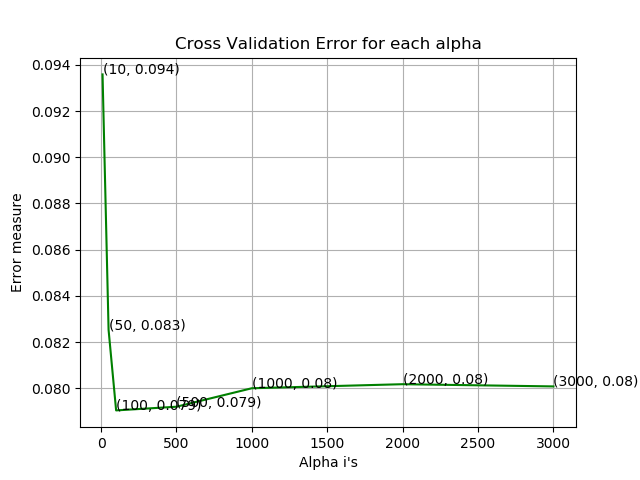

In [93]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.024819755576891478
log loss for cv data 0.07904491338488688
log loss for test data 0.07168657134325582
Number of misclassified points  1.609935602575897
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


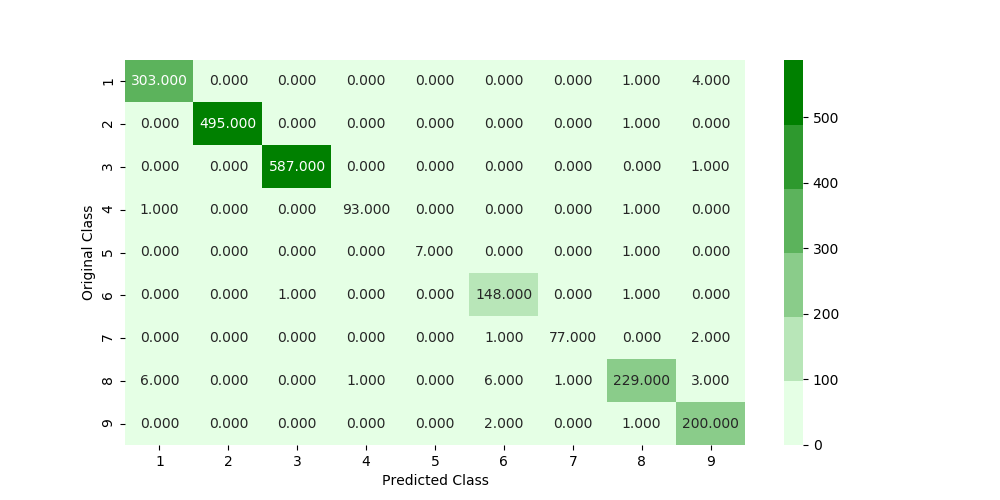

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


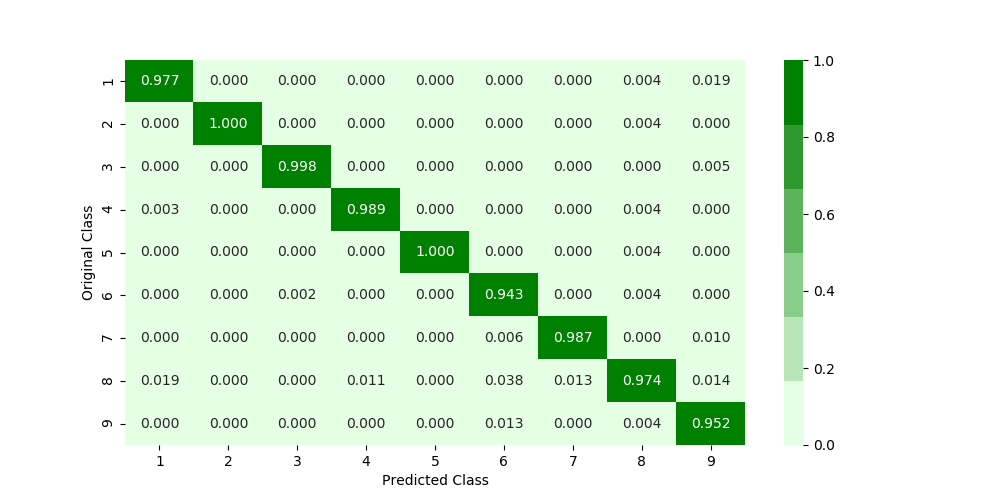

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


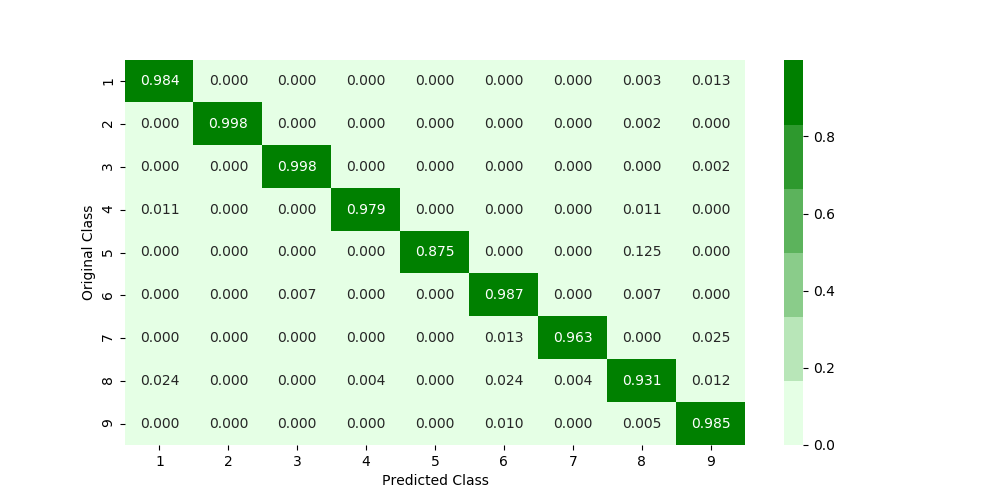

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [94]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
predict_y = sig_clf.predict_proba(X_train_merge)
print ('log loss for train data',(log_loss(y_train_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ('log loss for cv data',(log_loss(y_cv_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_merge)
print ('log loss for test data',(log_loss(y_test_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

### HyperParameter Tuned XGBoost  on Byte files unigram, ASM features & ASM image feature

In [95]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 14.7min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.4min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [96]:
print(random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3}


train loss 0.017555537143338063
cv loss 0.049817892852966346
test loss 0.06643020013696387
Number of misclassified points  1.1499540018399264
-------------------------------------------------- Confusion matrix --------------------------------------------------


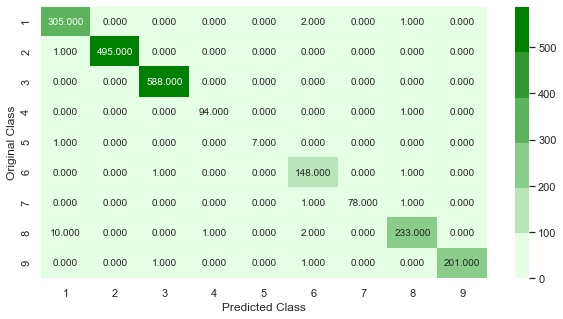

-------------------------------------------------- Precision matrix --------------------------------------------------


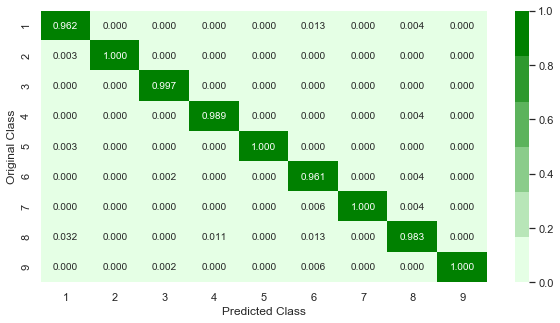

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


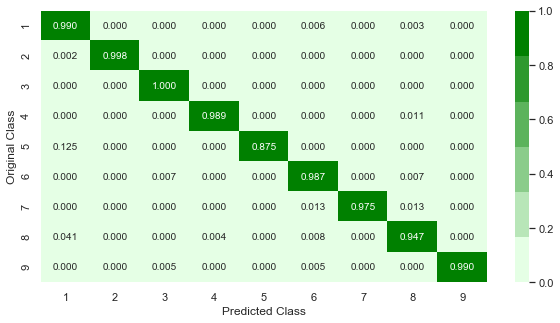

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [100]:
x_cfl=XGBClassifier(n_estimators=1000, learning_rate=0.03, colsample_bytree=0.3, max_depth=3, subsample=1, n_jobs=-1)
x_cfl.fit(X_train_merge, y_train_merge)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_merge, y_train_merge)

predict_y = c_cfl.predict_proba(X_train_merge)
print ('train loss',log_loss(y_train_merge, predict_y))
predict_y = c_cfl.predict_proba(X_cv_merge)
print ('cv loss',log_loss(y_cv_merge, predict_y))
predict_y = c_cfl.predict_proba(X_test_merge)
print ('test loss',log_loss(y_test_merge, predict_y))

plt.close()
plot_confusion_matrix(y_test_merge,c_cfl.predict(X_test_merge))

### Combining byte files bi-gram, asm features & asm image feature

In [97]:
comb_data = pd.concat([byte_bi_df_1, result_asm, img_new], axis = 1, join = 'inner')
comb_data.head()

f1 86     1f 71     f1 b3     a2 ea     cb 1e     ee 58     31 89  \
0  0.005295  0.000067  0.008667  0.008217  0.000510  0.000835  0.000307   
1  0.000000  0.000000  0.000000  0.000000  0.000510  0.000000  0.000077   
2  0.005295  0.000056  0.003250  0.005135  0.151488  0.000626  0.000384   
3  0.001059  0.000011  0.002167  0.000000  0.000510  0.000000  0.000537   
4  0.000000  0.000011  0.000000  0.001027  0.001020  0.000104  0.000230   

      44 8e     0a 2d     12 0b          ...             pix191    pix192  \
0  0.000087  0.000033  0.000144          ...           0.009593  0.009593   
1  0.000362  0.000265  0.052763          ...           0.009593  0.009593   
2  0.000050  0.000099  0.000108          ...           0.009593  0.009593   
3  0.000000  0.000066  0.000000          ...           0.009593  0.009593   
4  0.000000  0.000000  0.000000          ...           0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  \
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 554 columns]

In [98]:
comb_data_2 = comb_data.drop(['ID', 'Class'], axis=1)
comb_data_2.head()

f1 86     1f 71     f1 b3     a2 ea     cb 1e     ee 58     31 89  \
0  0.005295  0.000067  0.008667  0.008217  0.000510  0.000835  0.000307   
1  0.000000  0.000000  0.000000  0.000000  0.000510  0.000000  0.000077   
2  0.005295  0.000056  0.003250  0.005135  0.151488  0.000626  0.000384   
3  0.001059  0.000011  0.002167  0.000000  0.000510  0.000000  0.000537   
4  0.000000  0.000011  0.000000  0.001027  0.001020  0.000104  0.000230   

      44 8e     0a 2d     12 0b    ...       pix190    pix191    pix192  \
0  0.000087  0.000033  0.000144    ...     0.009593  0.009593  0.009593   
1  0.000362  0.000265  0.052763    ...     0.009593  0.009593  0.009593   
2  0.000050  0.000099  0.000108    ...     0.009593  0.009593  0.009593   
3  0.000000  0.000066  0.000000    ...     0.009593  0.009593  0.009593   
4  0.000000  0.000000  0.000000    ...     0.009593  0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  

[5 rows x 551 columns]

In [99]:
comb_data_2 = np.nan_to_num(comb_data_2)

### Train & Test Split

In [100]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(comb_data_2, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

### Random Forest classifier on byte files bi-gram, asm features & asm image feature

log_loss for c =  10 is 0.05594432723470286
log_loss for c =  50 is 0.040390245593763065
log_loss for c =  100 is 0.03962488636566595
log_loss for c =  500 is 0.038392230651333265
log_loss for c =  1000 is 0.03827118455193932
log_loss for c =  2000 is 0.03793790929235758
log_loss for c =  3000 is 0.037721819688108546


<IPython.core.display.Javascript object>


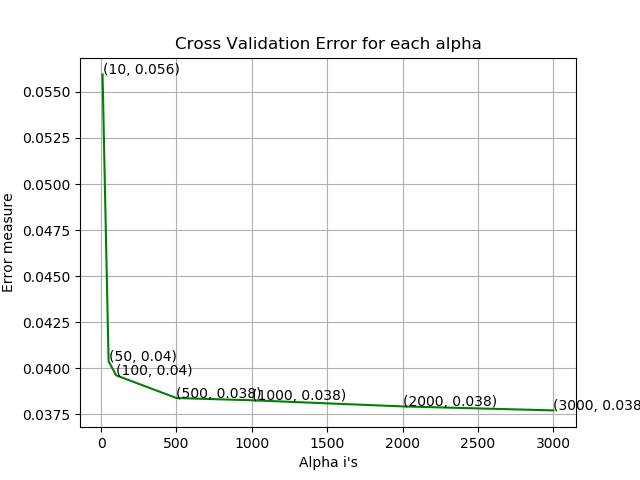

In [101]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.015077519806199778
log loss for cv data 0.037721819688108546
log loss for test data 0.03560755617013001
Number of misclassified points  0.8739650413983441
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


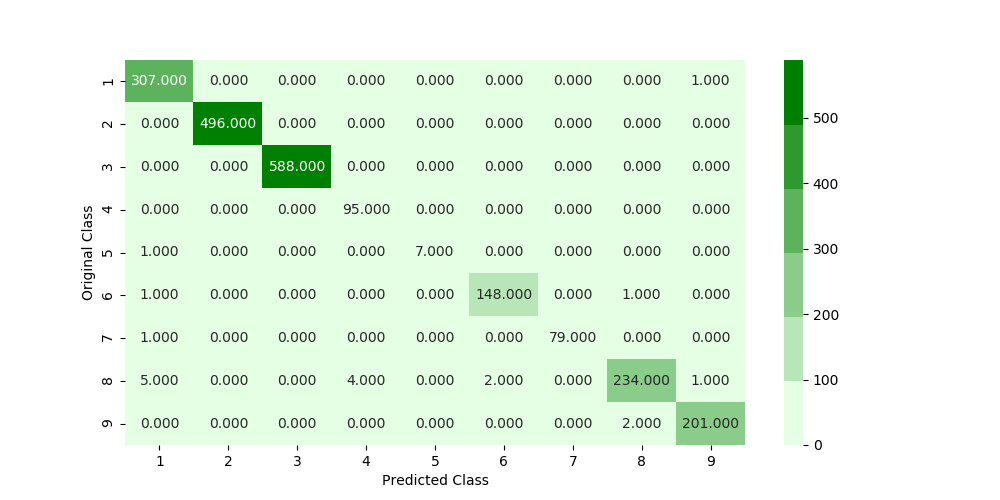

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


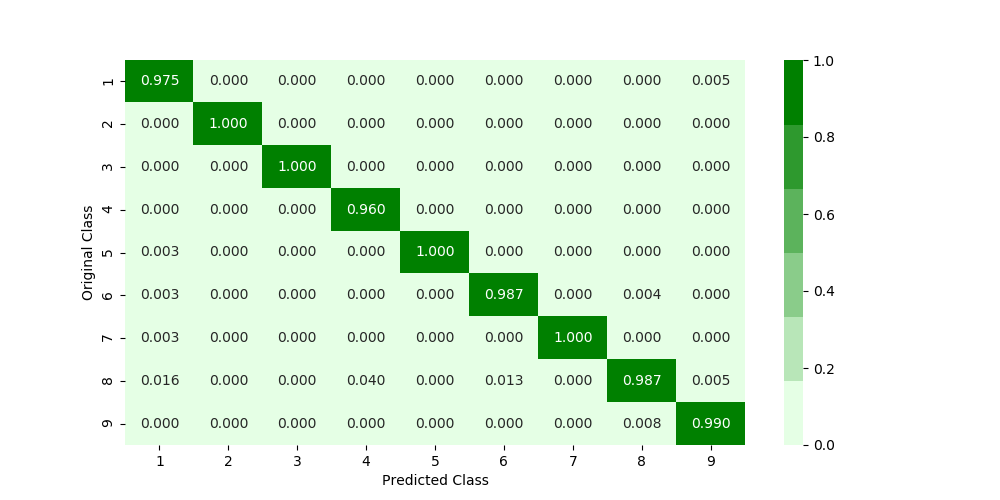

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


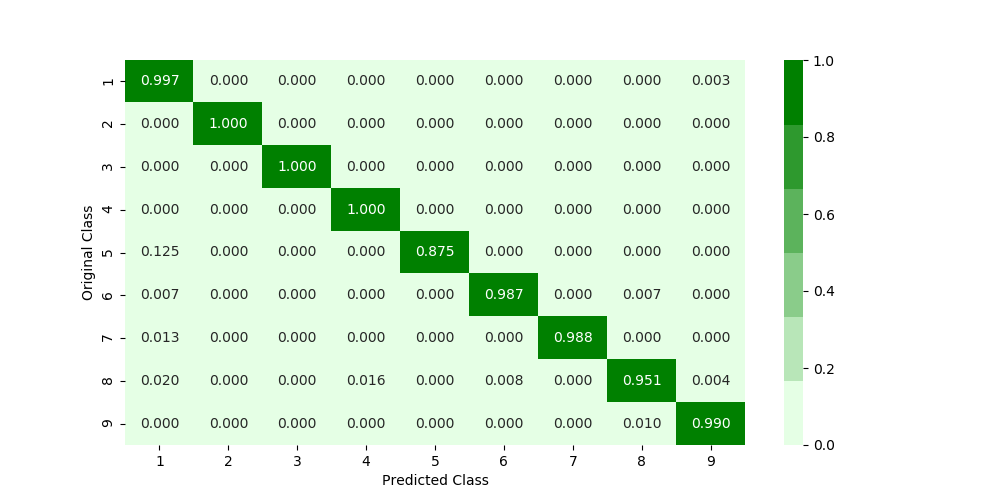

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [102]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
predict_y = sig_clf.predict_proba(X_train_merge)
print ('log loss for train data',(log_loss(y_train_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ('log loss for cv data',(log_loss(y_cv_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_merge)
print ('log loss for test data',(log_loss(y_test_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

### HyperParameter Tuned XGBoost on Byte files bi-gram, ASM features & ASM image feature

In [103]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  8.1min remaining:   53.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.1min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [104]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


In [105]:
x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.15, colsample_bytree=0.3, max_depth=10, subsample=1, n_jobs=-1)
x_cfl.fit(X_train_merge, y_train_merge)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_merge, y_train_merge)

predict_y = c_cfl.predict_proba(X_train_merge)
print ('train loss',log_loss(y_train_merge, predict_y))
predict_y = c_cfl.predict_proba(X_cv_merge)
print ('cv loss',log_loss(y_cv_merge, predict_y))
predict_y = c_cfl.predict_proba(X_test_merge)
print ('test loss',log_loss(y_test_merge, predict_y))

train loss 0.01429945926818971
cv loss 0.043889325406506634
test loss 0.04778832106704075


Number of misclassified points  0.8739650413983441
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


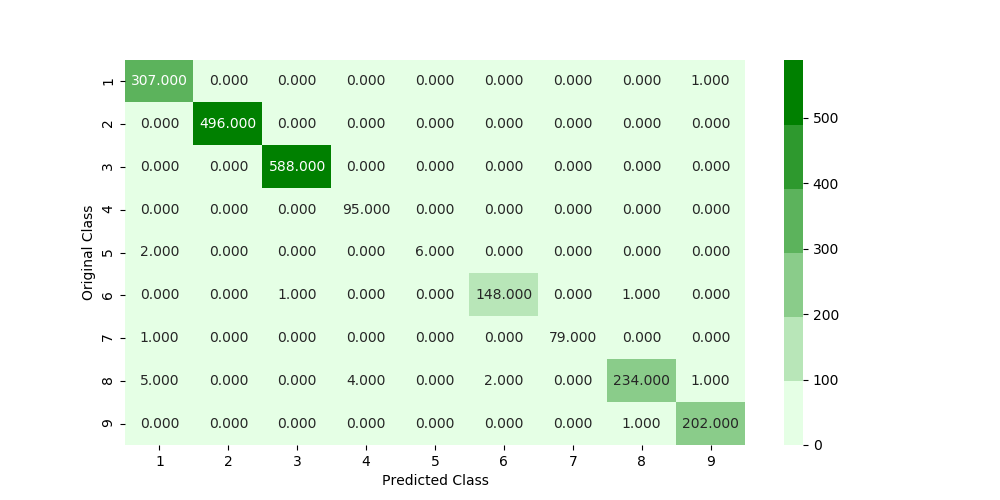

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


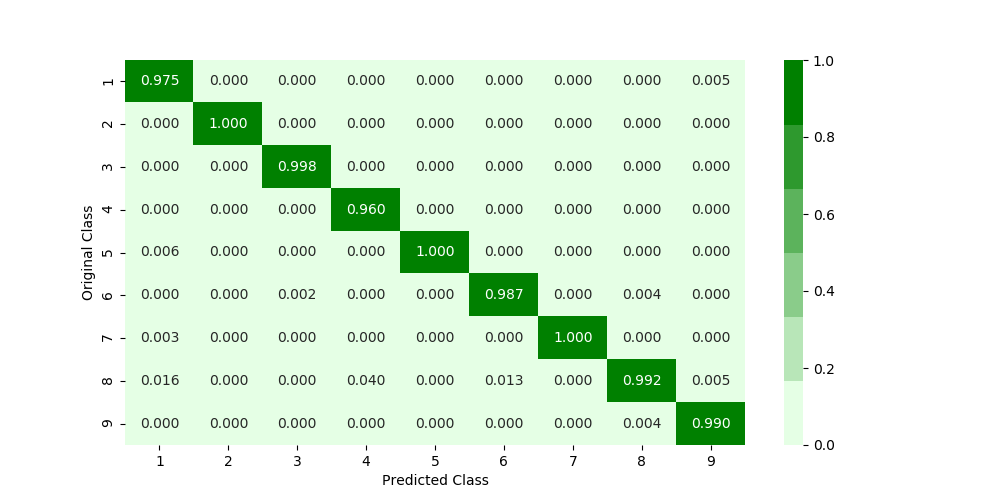

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


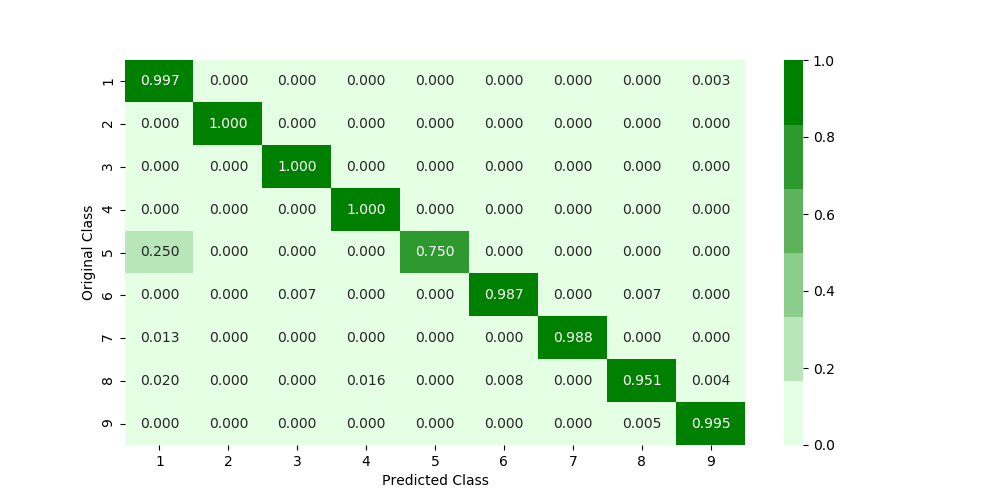

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [106]:
plt.close()
plot_confusion_matrix(y_test_merge,c_cfl.predict(X_test_merge))

### Combining byte files bi-gram & asm image feature

In [107]:
comb_data_3 = pd.concat([byte_bi_df_1, img_new], axis = 1, join = 'inner')
comb_data_3.head()

f1 86     1f 71     f1 b3     a2 ea     cb 1e     ee 58     31 89  \
0  0.005295  0.000067  0.008667  0.008217  0.000510  0.000835  0.000307   
1  0.000000  0.000000  0.000000  0.000000  0.000510  0.000000  0.000077   
2  0.005295  0.000056  0.003250  0.005135  0.151488  0.000626  0.000384   
3  0.001059  0.000011  0.002167  0.000000  0.000510  0.000000  0.000537   
4  0.000000  0.000011  0.000000  0.001027  0.001020  0.000104  0.000230   

      44 8e     0a 2d     12 0b          ...             pix191    pix192  \
0  0.000087  0.000033  0.000144          ...           0.009593  0.009593   
1  0.000362  0.000265  0.052763          ...           0.009593  0.009593   
2  0.000050  0.000099  0.000108          ...           0.009593  0.009593   
3  0.000000  0.000066  0.000000          ...           0.009593  0.009593   
4  0.000000  0.000000  0.000000          ...           0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  \
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 501 columns]

In [108]:
comb_data_3 = comb_data_3.drop(['ID'], axis=1)
comb_data_3.head()

f1 86     1f 71     f1 b3     a2 ea     cb 1e     ee 58     31 89  \
0  0.005295  0.000067  0.008667  0.008217  0.000510  0.000835  0.000307   
1  0.000000  0.000000  0.000000  0.000000  0.000510  0.000000  0.000077   
2  0.005295  0.000056  0.003250  0.005135  0.151488  0.000626  0.000384   
3  0.001059  0.000011  0.002167  0.000000  0.000510  0.000000  0.000537   
4  0.000000  0.000011  0.000000  0.001027  0.001020  0.000104  0.000230   

      44 8e     0a 2d     12 0b    ...       pix190    pix191    pix192  \
0  0.000087  0.000033  0.000144    ...     0.009593  0.009593  0.009593   
1  0.000362  0.000265  0.052763    ...     0.009593  0.009593  0.009593   
2  0.000050  0.000099  0.000108    ...     0.009593  0.009593  0.009593   
3  0.000000  0.000066  0.000000    ...     0.009593  0.009593  0.009593   
4  0.000000  0.000000  0.000000    ...     0.009593  0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  

[5 rows x 500 columns]

### Train & Test Split

In [109]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(comb_data_3, result_y,stratify=result_y,test_size=0.30)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.30)

### Random Forest Classifier on byte bi-grams Files & ASM Image Feature

log_loss for c =  10 is 0.06134983721742508
log_loss for c =  50 is 0.04984443751257351
log_loss for c =  100 is 0.04809199786436746
log_loss for c =  500 is 0.047252918158990326
log_loss for c =  1000 is 0.046618925102466575
log_loss for c =  2000 is 0.04631974297558685
log_loss for c =  3000 is 0.046452960130821785


<IPython.core.display.Javascript object>


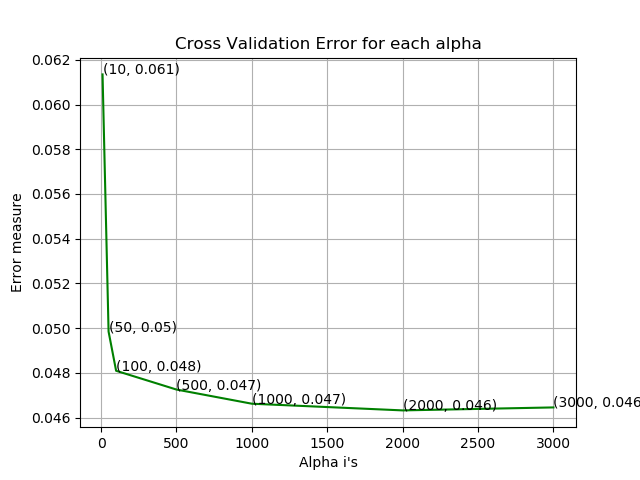

In [110]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.016314895892436555
log loss for cv data 0.04631974297558685
log loss for test data 0.05096376924779351
Number of misclassified points  1.226617601962588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


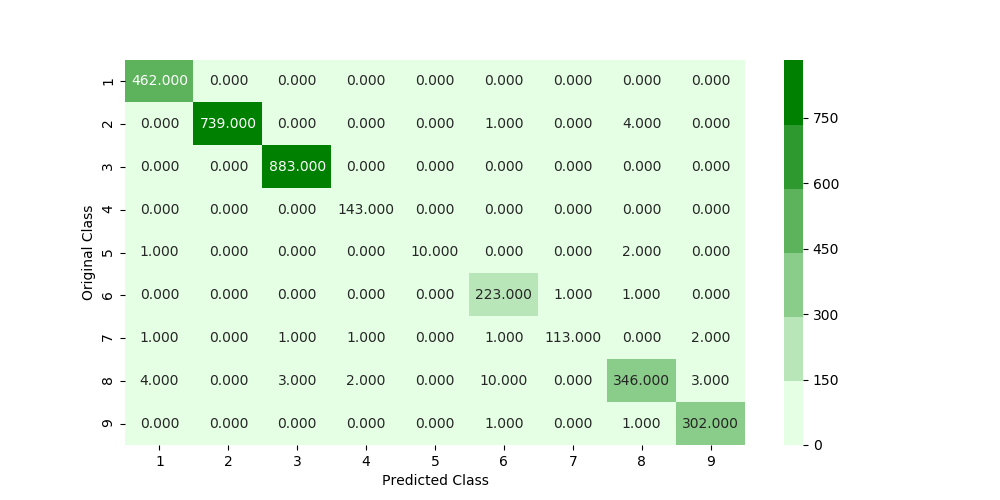

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


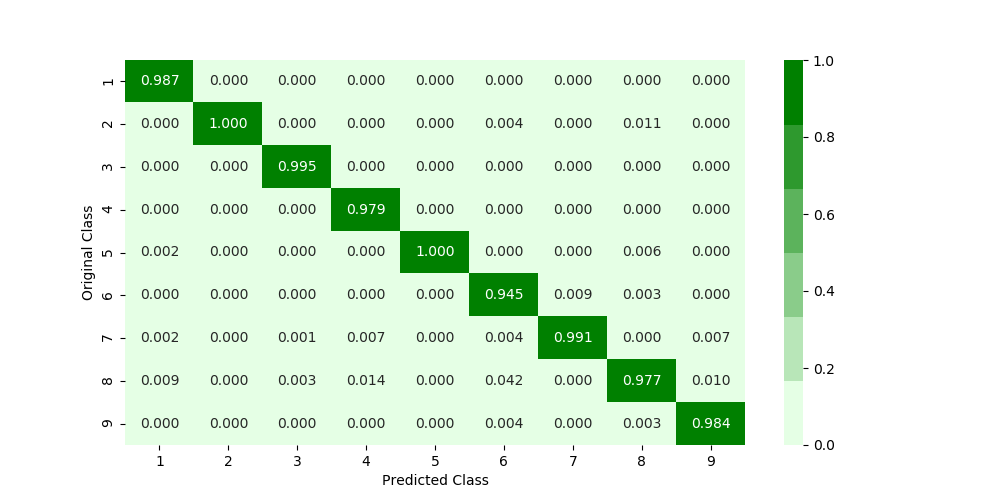

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


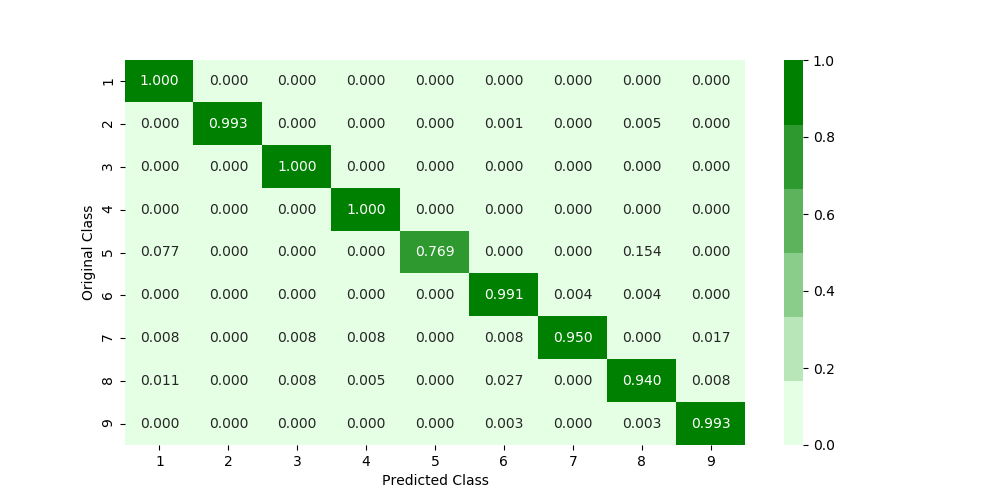

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [111]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
predict_y = sig_clf.predict_proba(X_train_merge)
print ('log loss for train data',(log_loss(y_train_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ('log loss for cv data',(log_loss(y_cv_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_merge)
print ('log loss for test data',(log_loss(y_test_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

### HyperParameter Tuned XGBoost on byte bi-grams Files & ASM Image Feature

In [112]:
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  7.8min remaining:   51.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.8min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       learning_rate=0.15, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [113]:
print (random_cfl.best_params_)

{'subsample': 0.3, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 1}


In [114]:
x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.1, colsample_bytree=1, max_depth=10, subsample=0.3, n_jobs=-1)
x_cfl.fit(X_train_merge, y_train_merge)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_merge, y_train_merge)

predict_y = c_cfl.predict_proba(X_train_merge)
print ('train loss',log_loss(y_train_merge, predict_y))
predict_y = c_cfl.predict_proba(X_cv_merge)
print ('cv loss',log_loss(y_cv_merge, predict_y))
predict_y = c_cfl.predict_proba(X_test_merge)
print ('test loss',log_loss(y_test_merge, predict_y))

train loss 0.016400968681616872
cv loss 0.04860737454938231
test loss 0.04776613242624286


Number of misclassified points  1.011959521619135
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


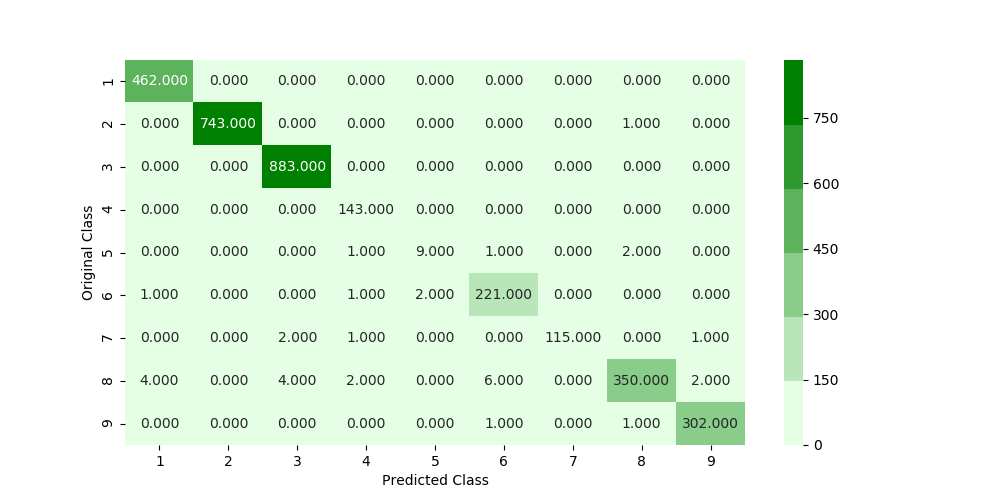

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


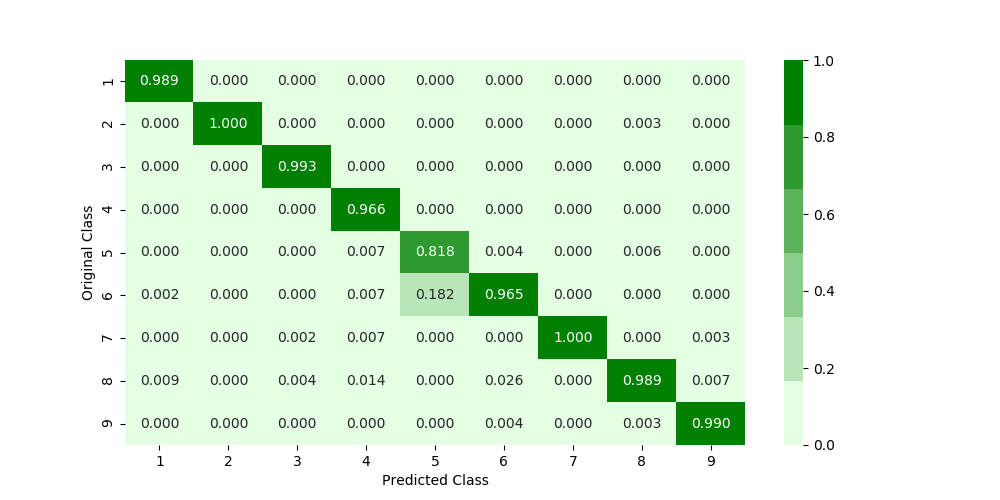

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


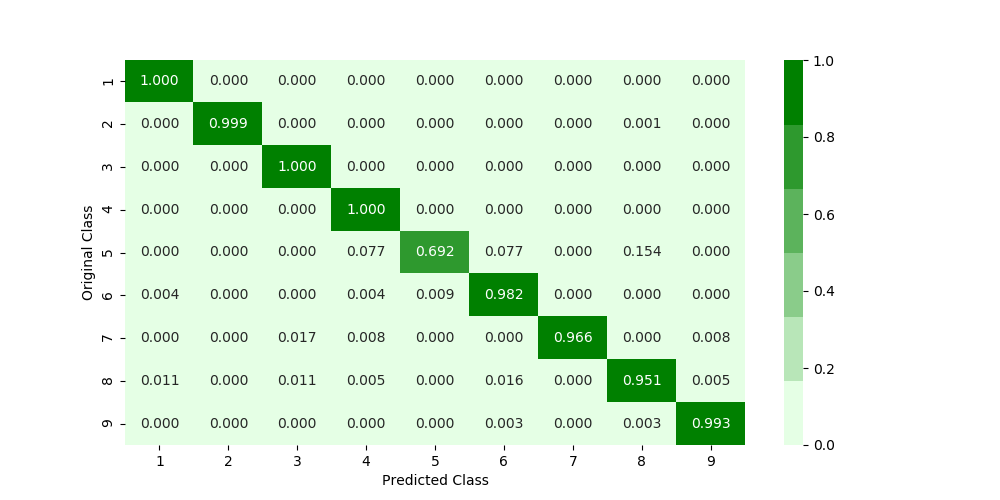

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [115]:
plt.close()
plot_confusion_matrix(y_test_merge,c_cfl.predict(X_test_merge))

### Combining all  the Advanced Features

#### Concatenating all the Features

In [116]:
adv_data = pd.concat([result_x, byte_bi_df_1, asm_bi_df, asm_tri_df, asm_4_df, img_new], axis = 1, join = 'inner')
adv_data.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9          ...             pix191    pix192  \
0  0.002946  0.002638  0.003531          ...           0.009593  0.009593   
1  0.006984  0.008267  0.000394          ...           0.009593  0.009593   
2  0.002155  0.008104  0.002707          ...           0.009593  0.009593   
3  0.000481  0.000959  0.000521          ...           0.009593  0.009593   
4  0.000229  0.000376  0.000246          ...           0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  \
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 1707 columns]

In [117]:
adv_data = adv_data.drop(['ID'], axis=1)
adv_data.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9    ...       pix190    pix191    pix192  \
0  0.002946  0.002638  0.003531    ...     0.009593  0.009593  0.009593   
1  0.006984  0.008267  0.000394    ...     0.009593  0.009593  0.009593   
2  0.002155  0.008104  0.002707    ...     0.009593  0.009593  0.009593   
3  0.000481  0.000959  0.000521    ...     0.009593  0.009593  0.009593   
4  0.000229  0.000376  0.000246    ...     0.009593  0.009593  0.009593   

     pix193    pix194    pix195    pix196    pix197    pix198    pix199  
0  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
1  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
2  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
3  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  
4  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  0.009593  

[5 rows x 1706 columns]

### Train & Test Split

In [118]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(adv_data, result_y,stratify=result_y,test_size=0.30)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.30)

### Random Forest classifier on all advanced features

log_loss for c =  10 is 0.03648352226602319
log_loss for c =  50 is 0.03256154225867737
log_loss for c =  100 is 0.03184520269188538
log_loss for c =  500 is 0.03249782536338217
log_loss for c =  1000 is 0.032167328408604916
log_loss for c =  2000 is 0.032382960498833296
log_loss for c =  3000 is 0.03230170029356027


<IPython.core.display.Javascript object>


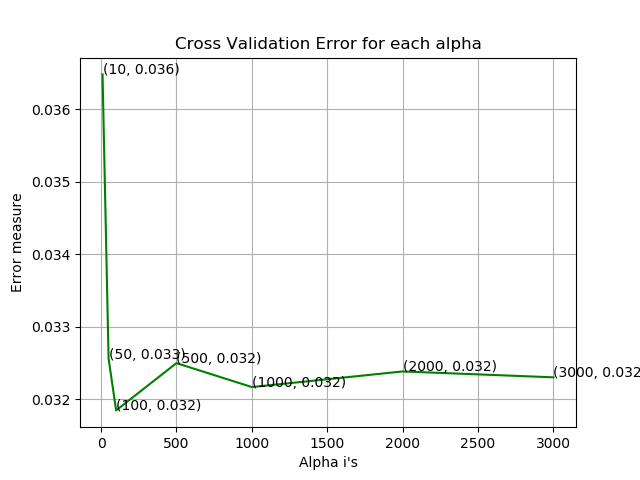

In [119]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.014884465260867705
log loss for cv data 0.03184520269188538
log loss for test data 0.03762214127356666
Number of misclassified points  0.5519779208831647
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


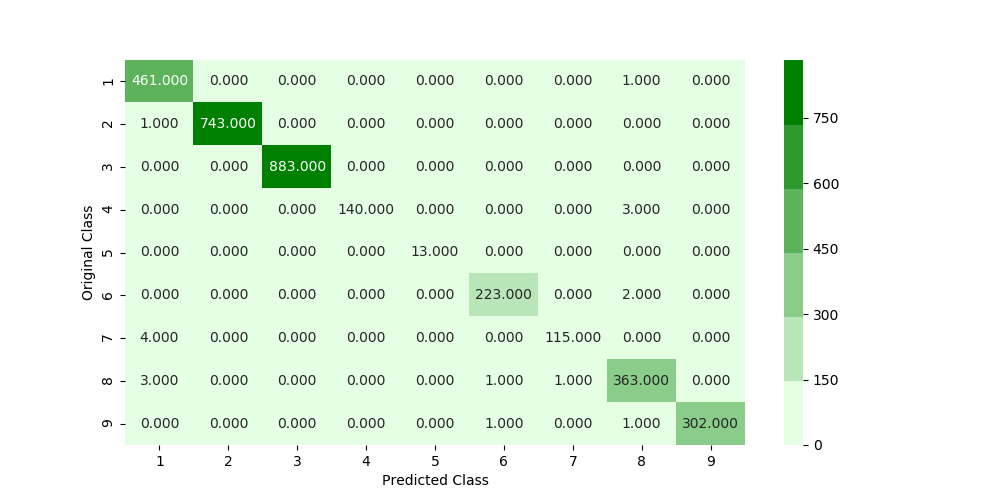

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


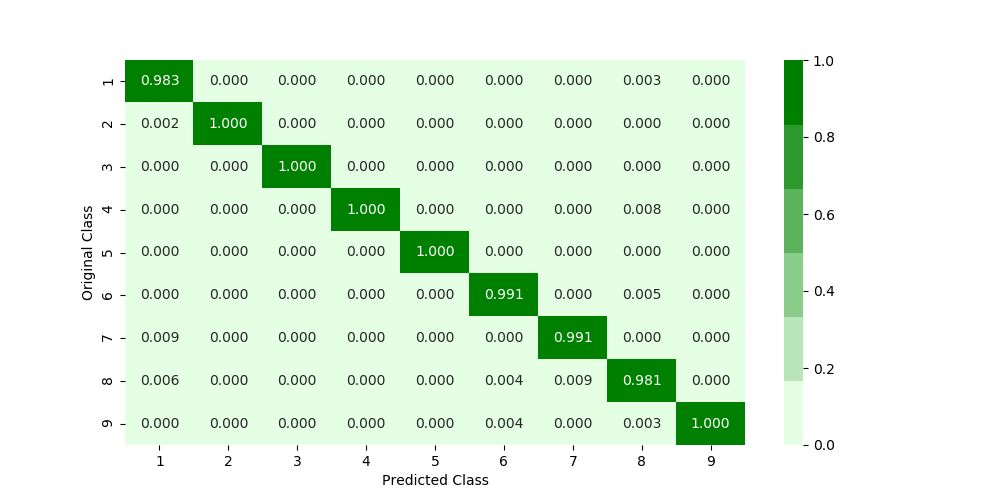

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


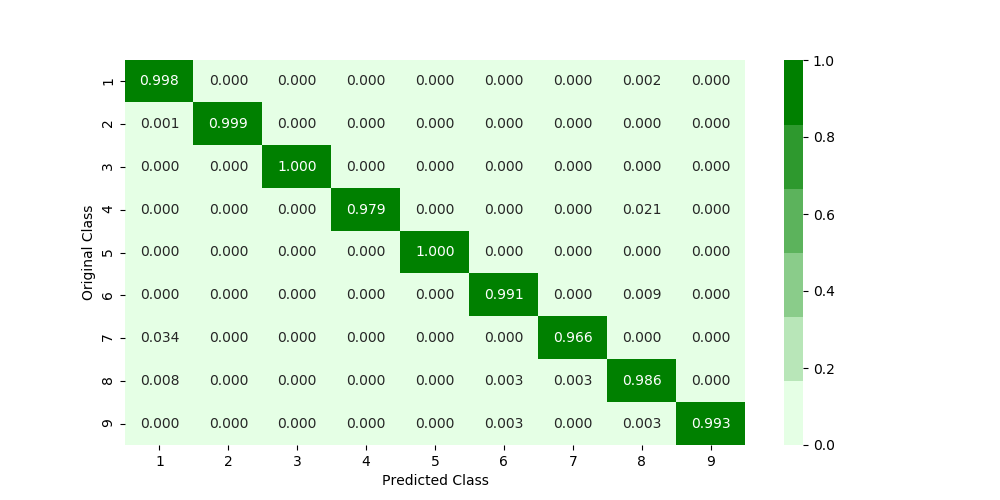

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [120]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
predict_y = sig_clf.predict_proba(X_train_merge)
print ('log loss for train data',(log_loss(y_train_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ('log loss for cv data',(log_loss(y_cv_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_merge)
print ('log loss for test data',(log_loss(y_test_merge, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

### HyperParameter Tuned XGBoost  on advanced features

In [121]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,7],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 40.3min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 44.9min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 7], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [122]:
print(random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1}


train loss 0.01232078475973484
cv loss 0.028189404850559405
test loss 0.03037071551588438
Number of misclassified points  0.5519779208831647
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


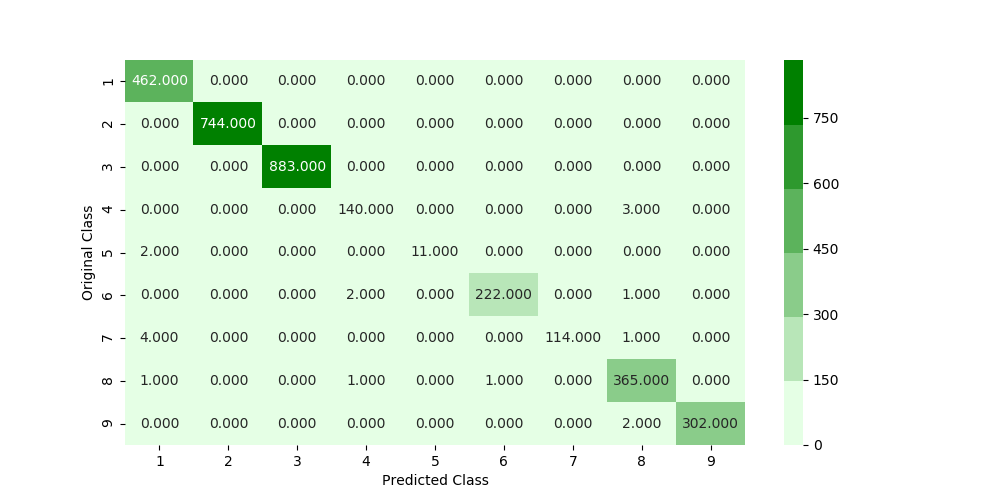

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


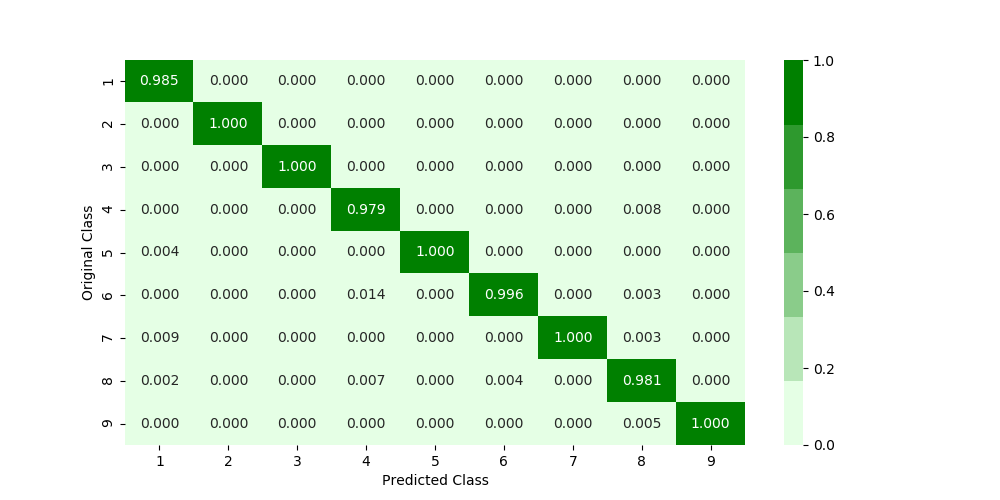

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


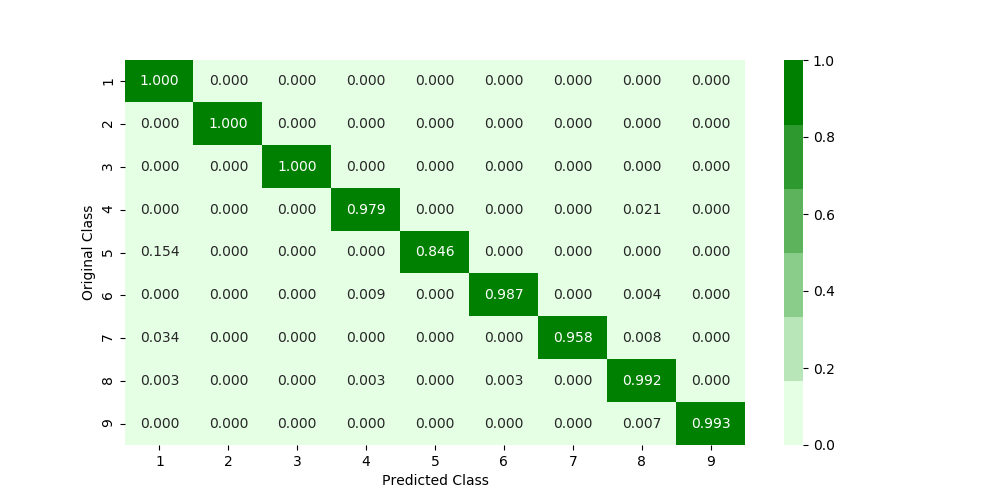

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [123]:
x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.01, colsample_bytree=1, max_depth=3, subsample=0.5, n_jobs=-1)
x_cfl.fit(X_train_merge, y_train_merge)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_merge, y_train_merge)

predict_y = c_cfl.predict_proba(X_train_merge)
print ('train loss',log_loss(y_train_merge, predict_y))
predict_y = c_cfl.predict_proba(X_cv_merge)
print ('cv loss',log_loss(y_cv_merge, predict_y))
predict_y = c_cfl.predict_proba(X_test_merge)
print ('test loss',log_loss(y_test_merge, predict_y))

plt.close()
plot_confusion_matrix(y_test_merge,c_cfl.predict(X_test_merge))

log_loss for c =  10 is 0.06062814281270455
log_loss for c =  100 is 0.02776405279413443
log_loss for c =  1000 is 0.026939908450589377
log_loss for c =  2000 is 0.026939980272149756


<IPython.core.display.Javascript object>


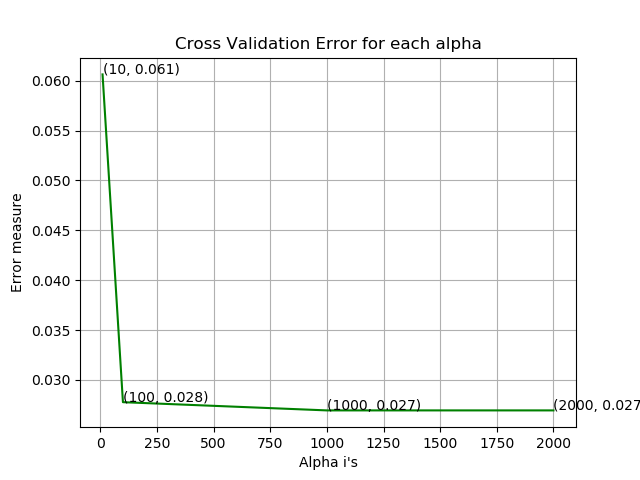

In [124]:
alpha=[10,100,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

train loss 0.012409313961248418
cv loss 0.026939980272149756
test loss 0.030838210768687875
Number of misclassified points  0.45998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


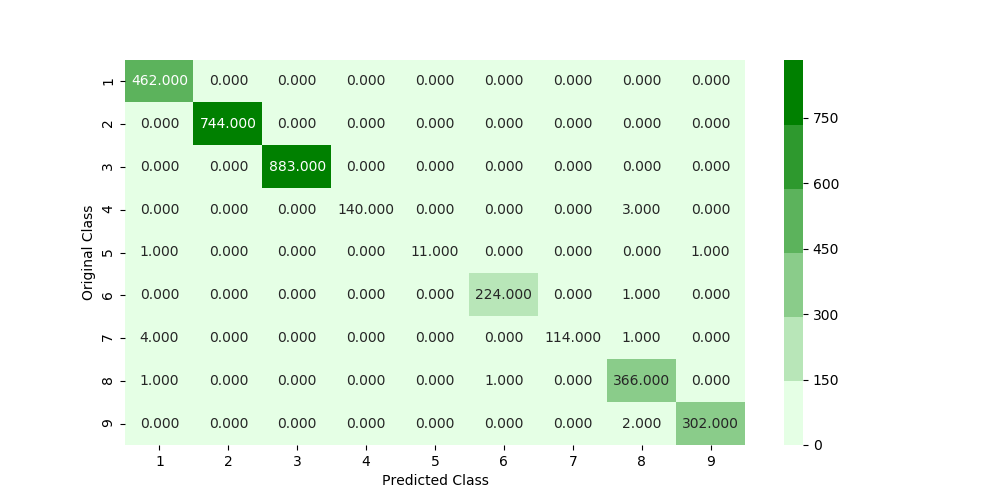

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


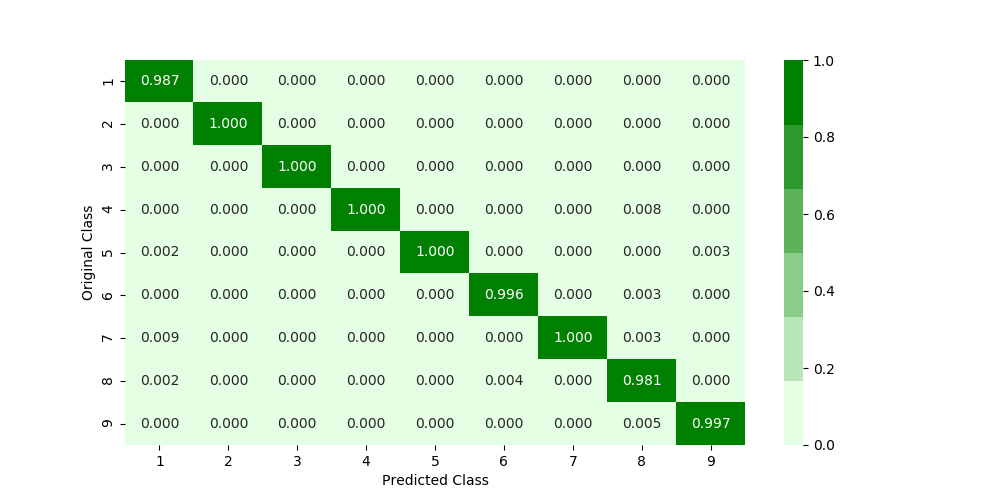

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


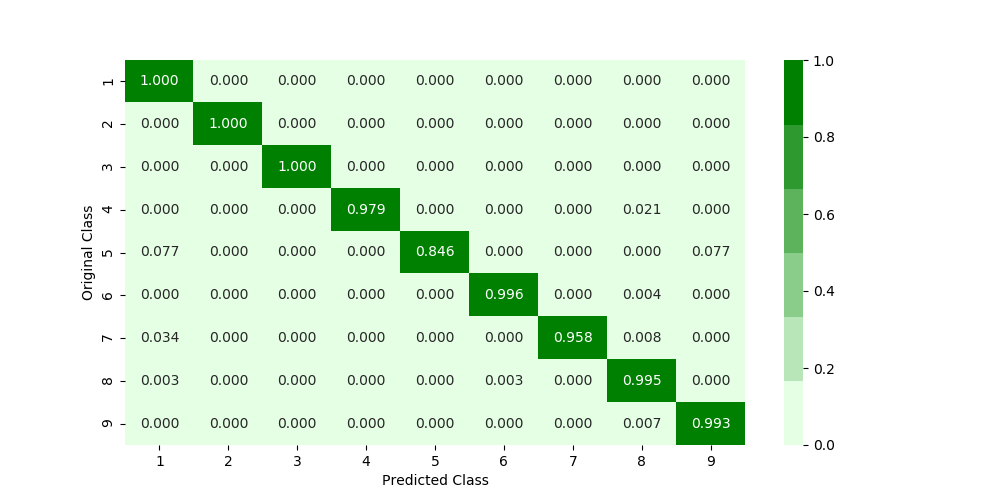

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [125]:
x_cfl=XGBClassifier(n_estimators=2000, n_jobs=-1)
x_cfl.fit(X_train_merge, y_train_merge)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_merge, y_train_merge)

predict_y = c_cfl.predict_proba(X_train_merge)
print ('train loss',log_loss(y_train_merge, predict_y))
predict_y = c_cfl.predict_proba(X_cv_merge)
print ('cv loss',log_loss(y_cv_merge, predict_y))
predict_y = c_cfl.predict_proba(X_test_merge)
print ('test loss',log_loss(y_test_merge, predict_y))

plt.close()
plot_confusion_matrix(y_test_merge,c_cfl.predict(X_test_merge))

In [ ]:
!pip install PrettyTable

In [126]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names  = ['Model', 'Features', 'Train Log Loss', 'CV Log Loss', 'Test Log Loss', '% Misclassified(Points)']

x.add_row(['Random Forest Classifier', 'Bytes-Bigram', '0.01', '0.03', '0.05', '1.24'])
x.add_row(['XGBoost Classifier', 'Bytes-Bigram', '0.01', '0.07', '0.04', '0.82'])
x.add_row(['Random Forest Classifier', 'Bytes-Bigram + ASM Image', '0.01', '0.05', '0.04', '0.64'])
x.add_row(['XGBoost Classifier', 'Bytes-Bigram + ASM Image', '0.01', '0.05', '0.03', '0.59'])
x.add_row(['Random Forest', 'ASM Files + ASM Images + Bytes Unigram', '0.02', '0.05', '0.07', '1.65'])
x.add_row(['Xgboost Classifier', 'ASM Files + ASM Images + Bytes Unigram', '0.02', '0.06', '0.06', '1.28'])
x.add_row(['Random Forest Classifier', 'ASM Files + ASM Images + Bytes Bi-gram', '0.01', '0.03', '0.04', '1.01'])
x.add_row(['Xgboost Classifier', 'ASM Files + ASM Images + Bytes Bi-gram', '0.01', '0.04', '0.03', '0.87'])
x.add_row(['Random Forest Classifier', 'All Features', '0.01', '0.02', '0.03', '0.55'])
x.add_row(['Xgboost Classifier', 'All Features', '0.01', '0.02', '0.03', '0.45'])
print(x)

+--------------------------+----------------------------------------+----------------+-------------+---------------+-------------------------+
|          Model           |                Features                | Train Log Loss | CV Log Loss | Test Log Loss | % Misclassified(Points) |
+--------------------------+----------------------------------------+----------------+-------------+---------------+-------------------------+
| Random Forest Classifier |              Bytes-Bigram              |      0.01      |     0.03    |      0.05     |           1.24          |
|    XGBoost Classifier    |              Bytes-Bigram              |      0.01      |     0.07    |      0.04     |           0.82          |
| Random Forest Classifier |        Bytes-Bigram + ASM Image        |      0.01      |     0.05    |      0.04     |           0.64          |
|    XGBoost Classifier    |        Bytes-Bigram + ASM Image        |      0.01      |     0.05    |      0.03     |           0.59          |

## References  :-

In [ ]:
#https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s
#https://towardsdatascience.com/malware-classification-using-machine-learning-7c648fb1da79
#https://github.com/mayank171986/Microsoft-Malware-Detection/blob/master/microsoft-malware-detection.ipynb
#https://github.com/matheen777/Microsoft_malware_detection/blob/master/MMD_final.ipynb
#https://www.kaggle.com/c/malware-classification/overview
##https://www.kaggle.com/c/microsoft-malware-pre diction/discussion/74639 